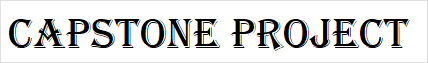


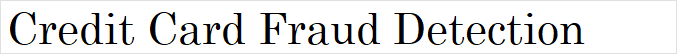

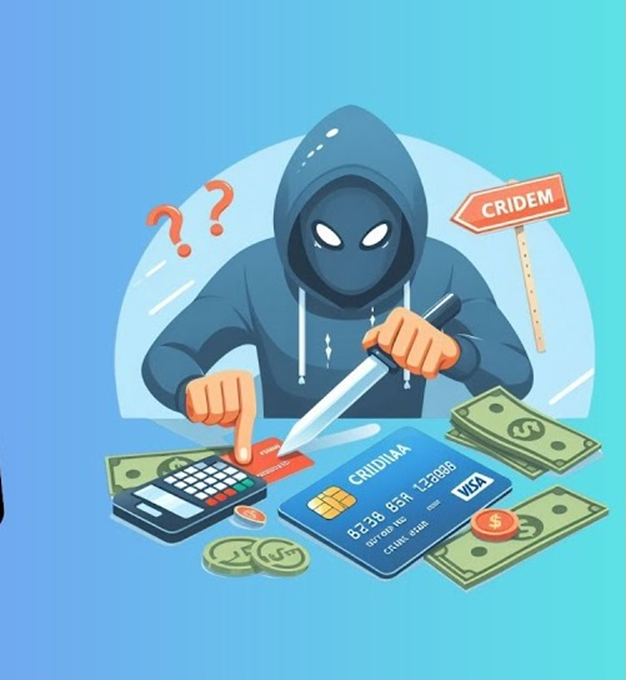

***Submitted by:*** Siddhartha Borgohain 



# Introduction:

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.


In this project, I will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

Key components involve data preprocessing, feature engineering, model selection, and evaluation metrics.

Ultimately, the project aims to provide a robust, efficient, and adaptive solution to safeguard financial transactions from the evolving landscape of fraudulent activities.



# Project Understanding

- Suppose you get a call from your bank, and the customer care executive informs you that your card is about to expire in a week. Immediately, you check your card details and realise that it will expire in the next eight days. Now, to renew your membership, the executive asks you to verify a few details such as your credit card number, the expiry date and the CVV number. Will you share these details with the executive?


- In such situations, you need to be careful because the details that you might share with them could grant them unhindered access to your credit card account.


- Although digital transactions in India registered a 51% growth in 2018–2019, their safety remains a concern. Fraudulent activities have increased severalfold, with approximately 52,304 cases of credit/debit card fraud reported in FY 2019 alone. Owing to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time to help consumers and banks that are losing their credit worth each day. Machine learning can play a vital role in detecting fraudulent transactions.


- So far, you have learnt about the different types of machine learning models. Now, you will learn which model to choose for your purpose and the reason for it. Understanding models based on different scenarios is an important skill that a data scientist / machine learning engineer should possess. In addition, tuning your model is equally important to get the best fit for your given data.


- By the end of this module, you will learn how you can build a machine learning model that is capable of detecting fraudulent transactions. You will also learn how to handle class imbalances present in any data set, along with model selection and hyperparameter tuning.


# Business problem overview

For many banks, protecting customers’ profitability is one of the main business goals. However, bank fraud poses a threat to the brand of different banks. This situation is a situation that worries both banks and consumers as it causes a loss of financial importance, trust and confidence.

A Nielsen report estimates that global banking fraud will reach $30 billion by 2020. With the rise of digital payments, the number of frauds has also increased exponentially in new and different ways.

In the banking industry, using machine learning for credit card fraud is not only a trend, but also important for fraud monitoring and prevention. Machine learning is helping these institutions reduce manual review time, chargebacks and fees, and reject legitimate transactions.


# Understanding and defining fraud

Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

-Manipulation/alteration of genuine cards
-Creation of counterfeit cards
-Stealing/loss of credit cards
-Fraudulent telemarketing
 
# Data dictionary

This data includes credit card transactions made by European cardholders for two days in September 2013. This data is suspicious and a good group (fraud) account accounts for 0.172% of the total stock. The dataset is also modified with principal component analysis (PCA) to protect privacy. Except for "Time" and "Value", all other features (V1, V2, V3, up to V28) are principal components using PCA. The special "time" contains the number of seconds between the first change in the configuration file and the next change. The "financial" property is the exchange rate. The unique "class" represents the class record, which has a value of 1 in the case of fraud and 0 otherwise.

# Project pipeline

The project process can be summarized in the following four steps:

***Understanding the Data:*** Here you need to load the data and understand the features available in it. This will help you select the features you need for your final design.

***Data Analysis (EDA):*** Usually in this step, you perform univariate and bivariate analysis of the data and then perform feature transformations as required. Since Gaussian variables are used for the current data, there is no need for Z scaling. However, you can check if there is any distortion in the material and try to reduce it as it will create problems in the design process.

***Training/Testing Split:*** Now that you know the training/testing split, you can do this to check the performance of your model using invisible data. Here k-fold cross validation method can be used for validation. You should choose a suitable value of k so that the minority is represented in the fold test.

***Building Model/Tuning Hyperparameters:*** This is the final step where you can test different models and tune their hyperparameters until you get a certain level of performance on the given data. You should try different sampling methods to see if you can get a better model.

***Standard Test:*** Test the standard using appropriate measuring instruments. Remember that since information is not equal, it is more important to identify a fraudulent transaction than a non-fraudulent transaction. Select appropriate measurements that reflect this business objective.




# Data Preprocessing

In [1]:
# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', 500)

## Exploratory data analysis

In [3]:
#To read csv File from google drive
df = pd.read_csv(f'D:\\creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [4]:
df.shape

(284807, 31)

In [5]:
#observe the different feature type present in the data
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

### Handling Missing Values

In [7]:
#checking null values
null=[i for i in df.columns if df[i].isnull().any()]
null

[]

We can see that there is no missing value present in the dataframe.

### Outliers treatment

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe.

### Observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

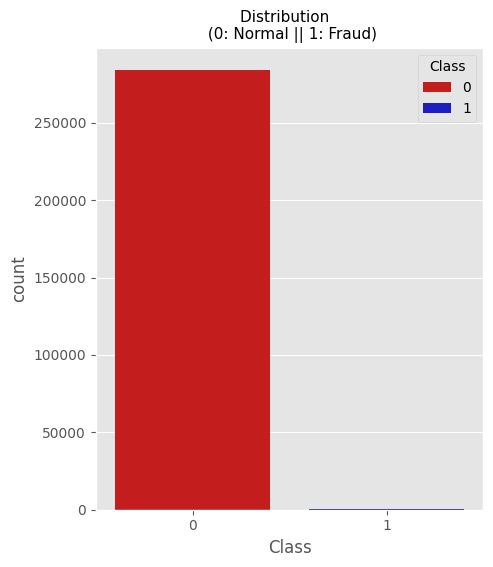

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.style.use('ggplot')
plt.figure(figsize=(5, 6))
colors = [ "#DF0101", "#0101DF"]
sns.countplot(x='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution  \n (0: Normal || 1: Fraud)', fontsize=11)
plt.show()

plt.show()

**Observation**

Only 473  among 284807 records are labeled as fradudulent transaction.

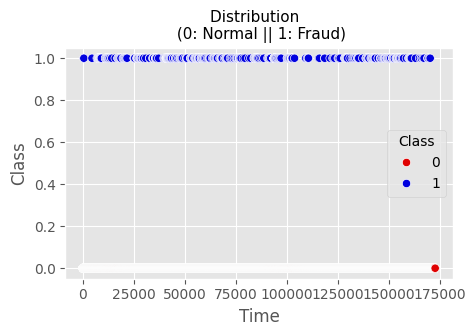

In [10]:
# Create a scatter plot to observe the distribution of classes with time
plt.style.use('ggplot')
plt.figure(figsize=(5, 3))
colors = [ "#DF0101", "#0101DF"]
sns.scatterplot(x='Time',y='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution  \n (0: Normal || 1: Fraud)', fontsize=11)
plt.show()

**Observation**

Since both fraudulent and non-fraudulent transactions are distributed over time, not much information can be obtained from the distribution of fraud over time.

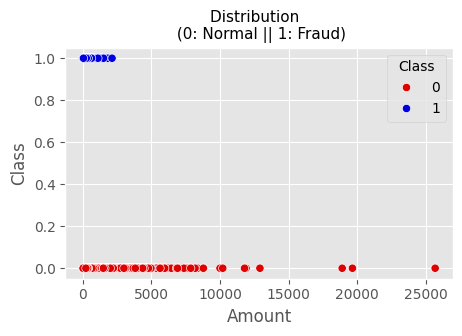

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(5, 3))
colors = [ "#DF0101", "#0101DF"]
sns.scatterplot(y='Class',x='Amount', data = df, palette=colors, hue='Class')
plt.title('Distribution  \n (0: Normal || 1: Fraud)', fontsize=11)
plt.show()

**Observation**

Obviously, small businesses are more prone to fraud than larger businesses.

Dropping `Time` column as this feature is not going to help in the model building.

In [12]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

#### Plotting the distributions of all the featuers

<Figure size 640x480 with 0 Axes>

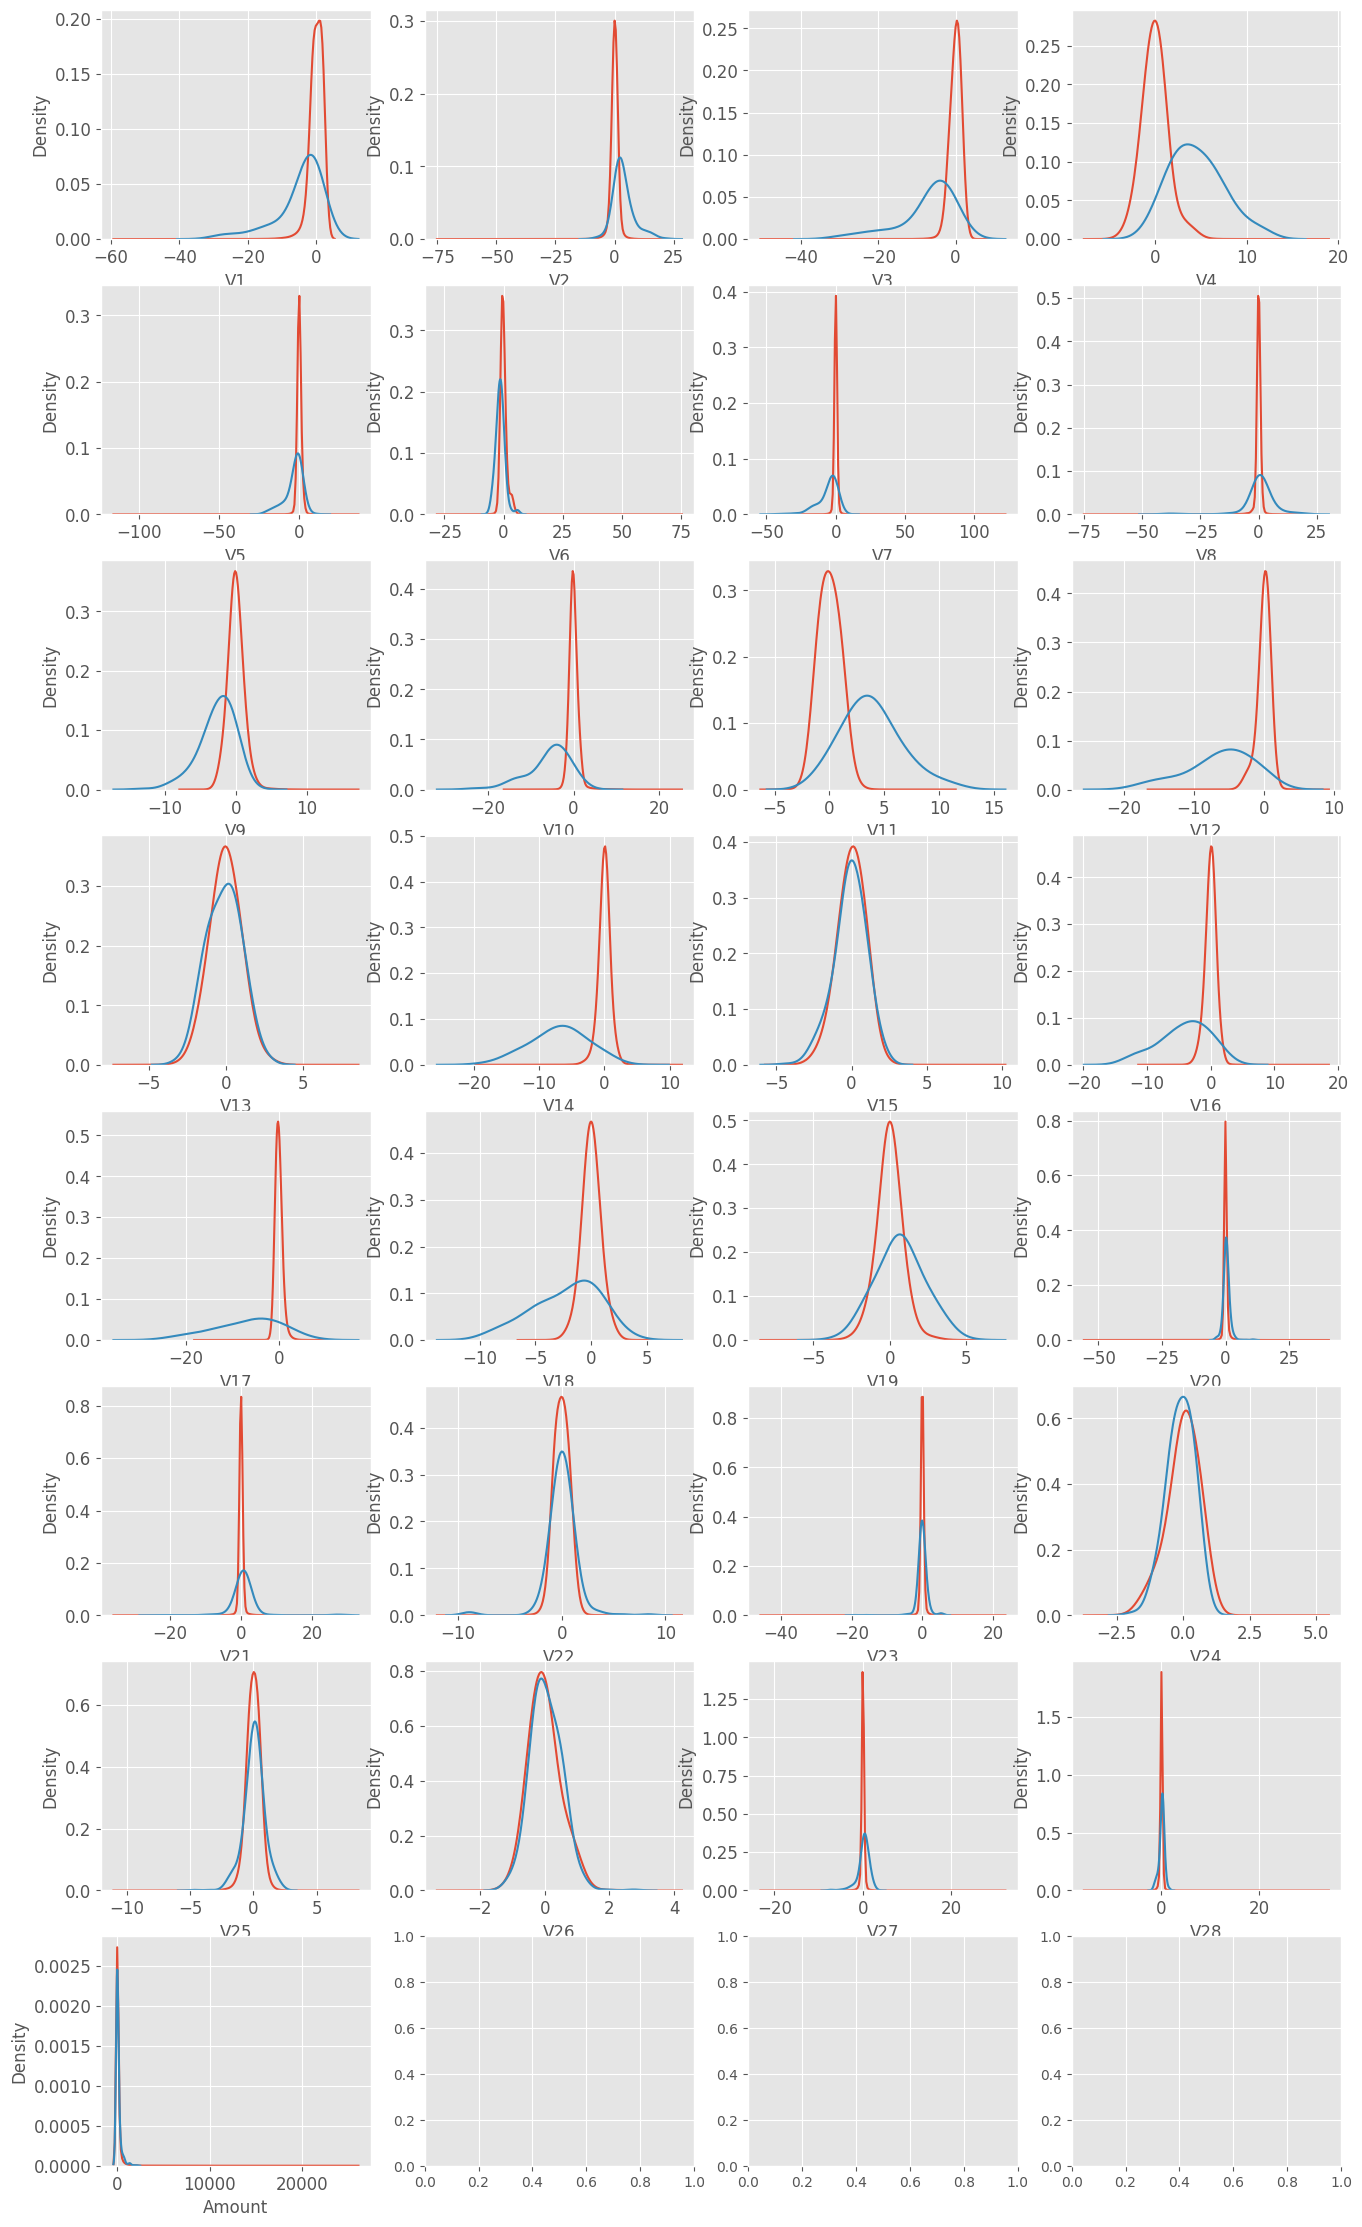

In [13]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

most of the distributions are overlapping for both the fraud and non-fraud transactions.

### Splitting the data into train & test data

In [14]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [15]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Feature Scaling using Standard Scaler

We need to scale `Amount` column.

In [17]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [142]:
X_train.sample(5)

V1        V2        V3        V4        V5        V6        V7  \
242419  1.325951 -0.085030 -1.719952  0.064927  1.320065  0.692169  0.326326   
138579 -0.147115  0.347115  0.485036 -0.371268  0.177680 -0.267723  0.036630   
179372  1.449131 -0.124463 -0.826380  0.392179 -0.068050 -0.860080  0.141548   
94954  -0.563532  0.508498  0.942309 -0.258145 -0.478518 -0.491118  0.094781   
54292   0.287690 -0.285636 -0.033254  1.150869 -0.230274 -0.067996  0.240514   

              V8        V9       V10       V11       V12       V13       V14  \
242419  0.063140 -0.096898 -0.233984  1.188521  0.595772 -0.354211 -0.434735   
138579 -0.888086 -0.070003 -0.431243 -1.127149 -0.166820  0.181876  0.201101   
179372 -0.366638  0.538431  0.104626 -0.746478  0.385769  0.114606  0.219987   
94954   0.323990 -0.103653 -0.892472 -0.884053  0.225510 -0.014386 -0.033986   
54292  -0.091403 -0.330384  0.092096  1.726743  1.328628 -0.018642  0.676240   

             V15       V16       V17       V18       V19       V20       V21  \
242419 -0.039837 -0.844582  1.421673 -0.822689 -0.566050 -0.244730  0.202196   
138579  0.585332  0.946363 -1.104126 -0.306243 -0.570943 -0.352825  0.654311   
179372  0.087946 -0.246007 -0.346764 -0.940706  0.100445 -0.294180 -0.387587   
94954  -0.336711 -0.212314  0.276875 -0.672610  0.559305 -0.181510 -0.275872   
54292   0.469622 -0.179186 -0.421301 -0.144792 -0.576305  0.273064  0.340682   

             V22       V23       V24       V25       V26       V27       V28  \
242419  0.559552 -0.099212 -0.965790  0.227492  0.792462 -0.065724 -0.221084   
138579 -1.241884 -0.494663 -0.466924  0.643304  0.062743  0.112326  0.665637   
179372 -0.685088  0.539874 -0.082623 -0.302688  0.205270 -0.067412 -0.178938   
94954  -0.615938  0.032161  0.442103 -0.212750  0.784276 -0.165037 -0.141824   
54292   0.300260 -0.368310  0.248605  0.492296 -0.348925 -0.007891  0.139478   

          Amount  
242419 -0.048276  
138579 -0.791722  
179372 -1.003853  
94954  -0.758386  
54292   1.620856

In [143]:
X_test.sample(5)

V1        V2        V3        V4        V5        V6        V7  \
188947 -0.776691  1.063149 -0.741857 -0.821591  0.377269 -0.189795  0.230577   
177894 -0.284082  0.483903  0.260272 -0.578312  0.137740 -0.813620  0.713825   
42538   0.609382  0.368820 -0.171155  2.238594  0.436745  0.222829  0.306419   
167290 -0.627048 -0.273684  0.866725 -3.531043 -0.051815  0.539083 -0.157030   
200655 -0.324944  0.708977 -0.907867 -0.227821  0.325600 -0.687492  0.364185   

              V8        V9       V10       V11       V12       V13       V14  \
188947  0.839162 -0.914596 -1.240878  0.378958 -0.271281 -0.846878 -0.015138   
177894 -0.133763 -0.311077 -0.186741  1.282823  1.058918 -0.387016  0.361063   
42538  -0.055203 -1.302248  0.816303  1.100732  0.538007 -0.040212  0.756671   
167290  0.038356 -1.680776  1.189661 -0.539836 -1.511485 -0.817028 -0.737207   
200655  0.143762 -0.187176 -0.658345  0.641597  0.135256 -0.396087 -0.434915   

             V15       V16       V17       V18       V19       V20       V21  \
188947 -0.199794  1.150925  0.403324  1.210873 -0.165950 -0.435886  0.519860   
177894 -1.074083 -0.203639 -0.495957 -0.498128 -0.073487 -0.095148 -0.221082   
42538  -0.223383  0.316126 -0.702817 -0.353585 -0.831277 -0.234487  0.075755   
167290 -1.065121  0.147869 -0.581337  1.055307 -0.122862 -0.055110 -0.431999   
200655  0.042284  0.561954  0.206188  1.370711  0.201120 -0.398581  0.528155   

             V22       V23       V24       V25       V26       V27       V28  \
188947  0.693199 -0.433298  0.236013 -0.040700  0.611536 -0.304168  0.091572   
177894 -0.349999  0.197496  0.476834 -0.616664  0.092319  0.246758  0.293936   
42538   0.108190 -0.214429 -0.295692  0.673693  0.100964 -0.026671 -0.011064   
167290 -0.288951 -0.809254 -0.360420  0.767016 -0.128431  0.205627 -0.179553   
200655  0.959901 -0.138285 -0.489108 -0.268508 -0.166635 -0.339221 -0.169254   

          Amount  
188947 -0.461775  
177894 -1.039167  
42538  -1.074856  
167290 -0.744305  
200655 -0.573034

### Plotting the distribution of a variable to handle skewness

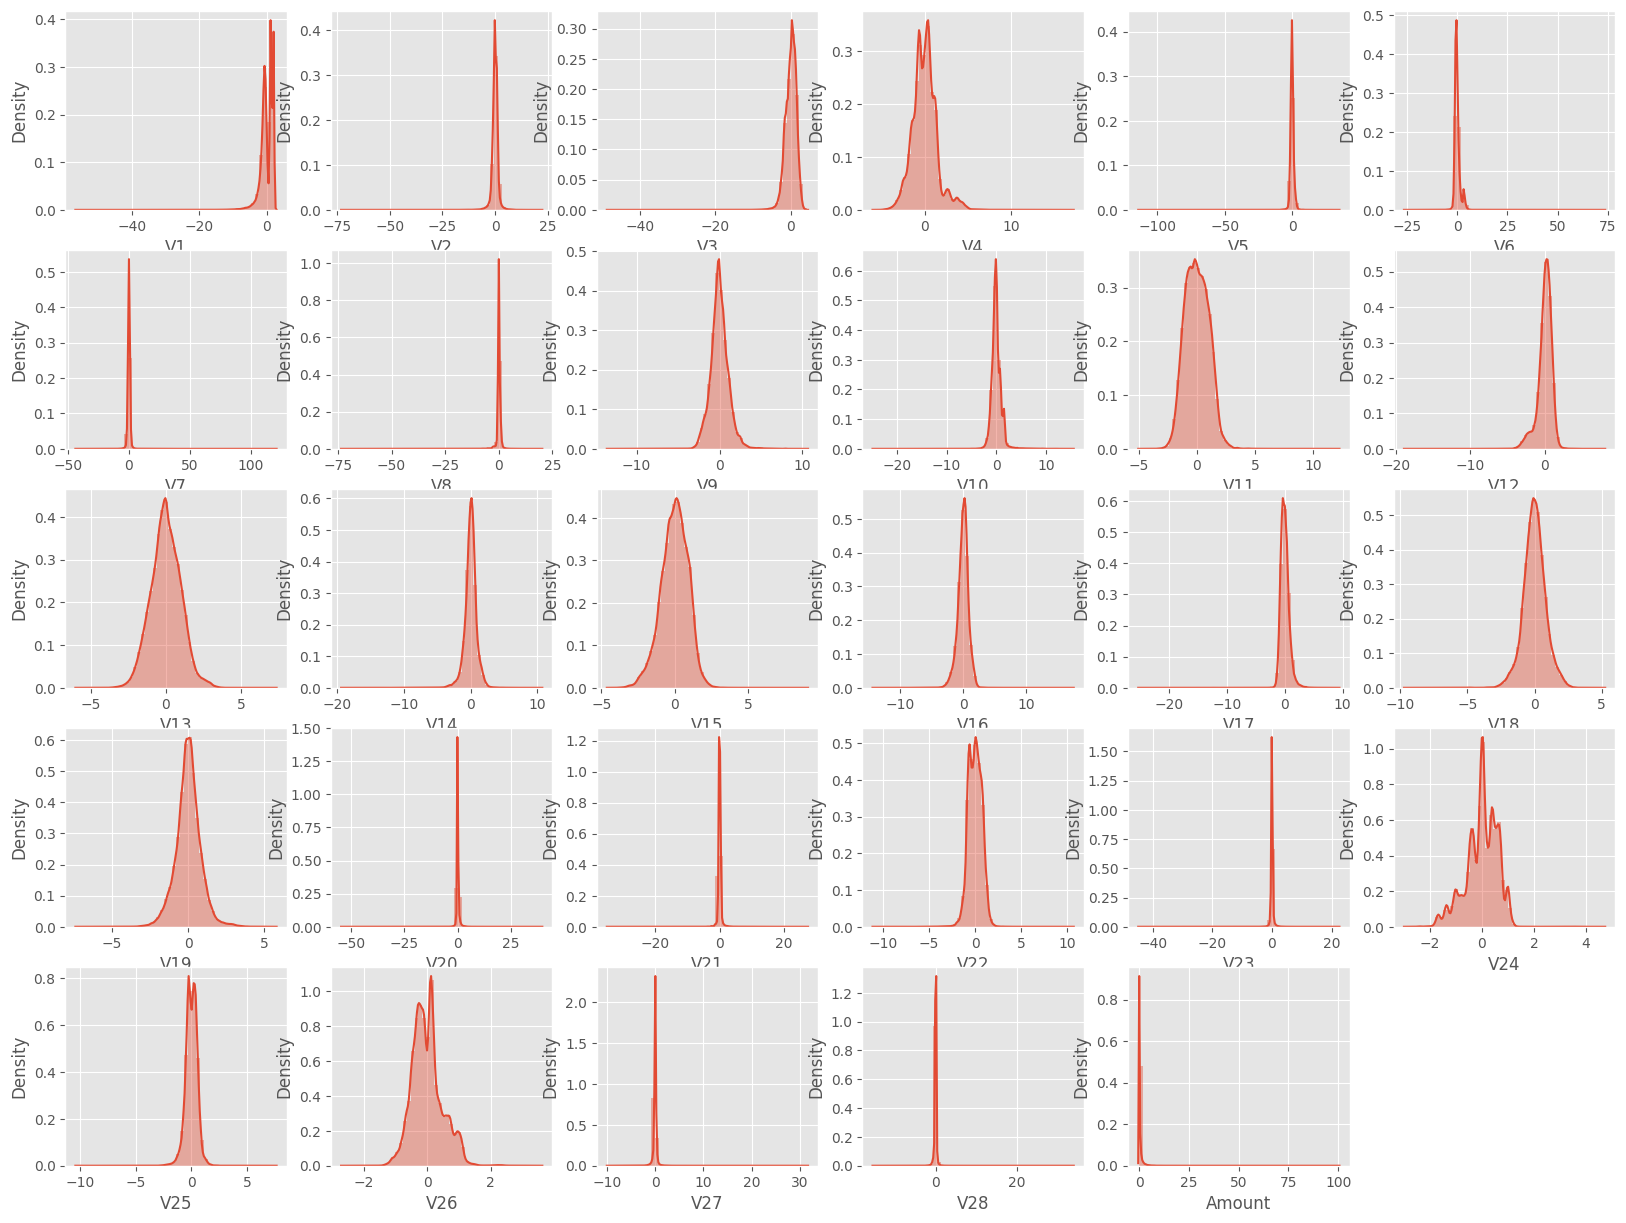

In [20]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [21]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features        V1        V2        V3        V4        V5        V6       V7  \
Skewness -3.320269 -4.826847 -2.219375  0.677776 -2.928646  1.977725  3.74462   

Features        V8        V9       V10       V11       V12       V13  \
Skewness -8.445014  0.543603  1.212102  0.359527 -2.281334  0.067612   

Features       V14       V15       V16       V17       V18       V19  \
Skewness -1.992812 -0.308053 -1.113875 -3.975821 -0.266115  0.107289   

Features       V20       V21       V22       V23       V24       V25  \
Skewness -1.977859  3.656863 -0.230008 -6.285467 -0.552668 -0.417168   

Features       V26      V27        V28     Amount  
Skewness  0.579265 -0.03833  11.776522  18.352356

In [22]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### There is skewness present in the distribution :
- Power Transformer package present in the <b>preprocessing library provided by sklearn</b> is used to make the distribution more gaussian

In [23]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

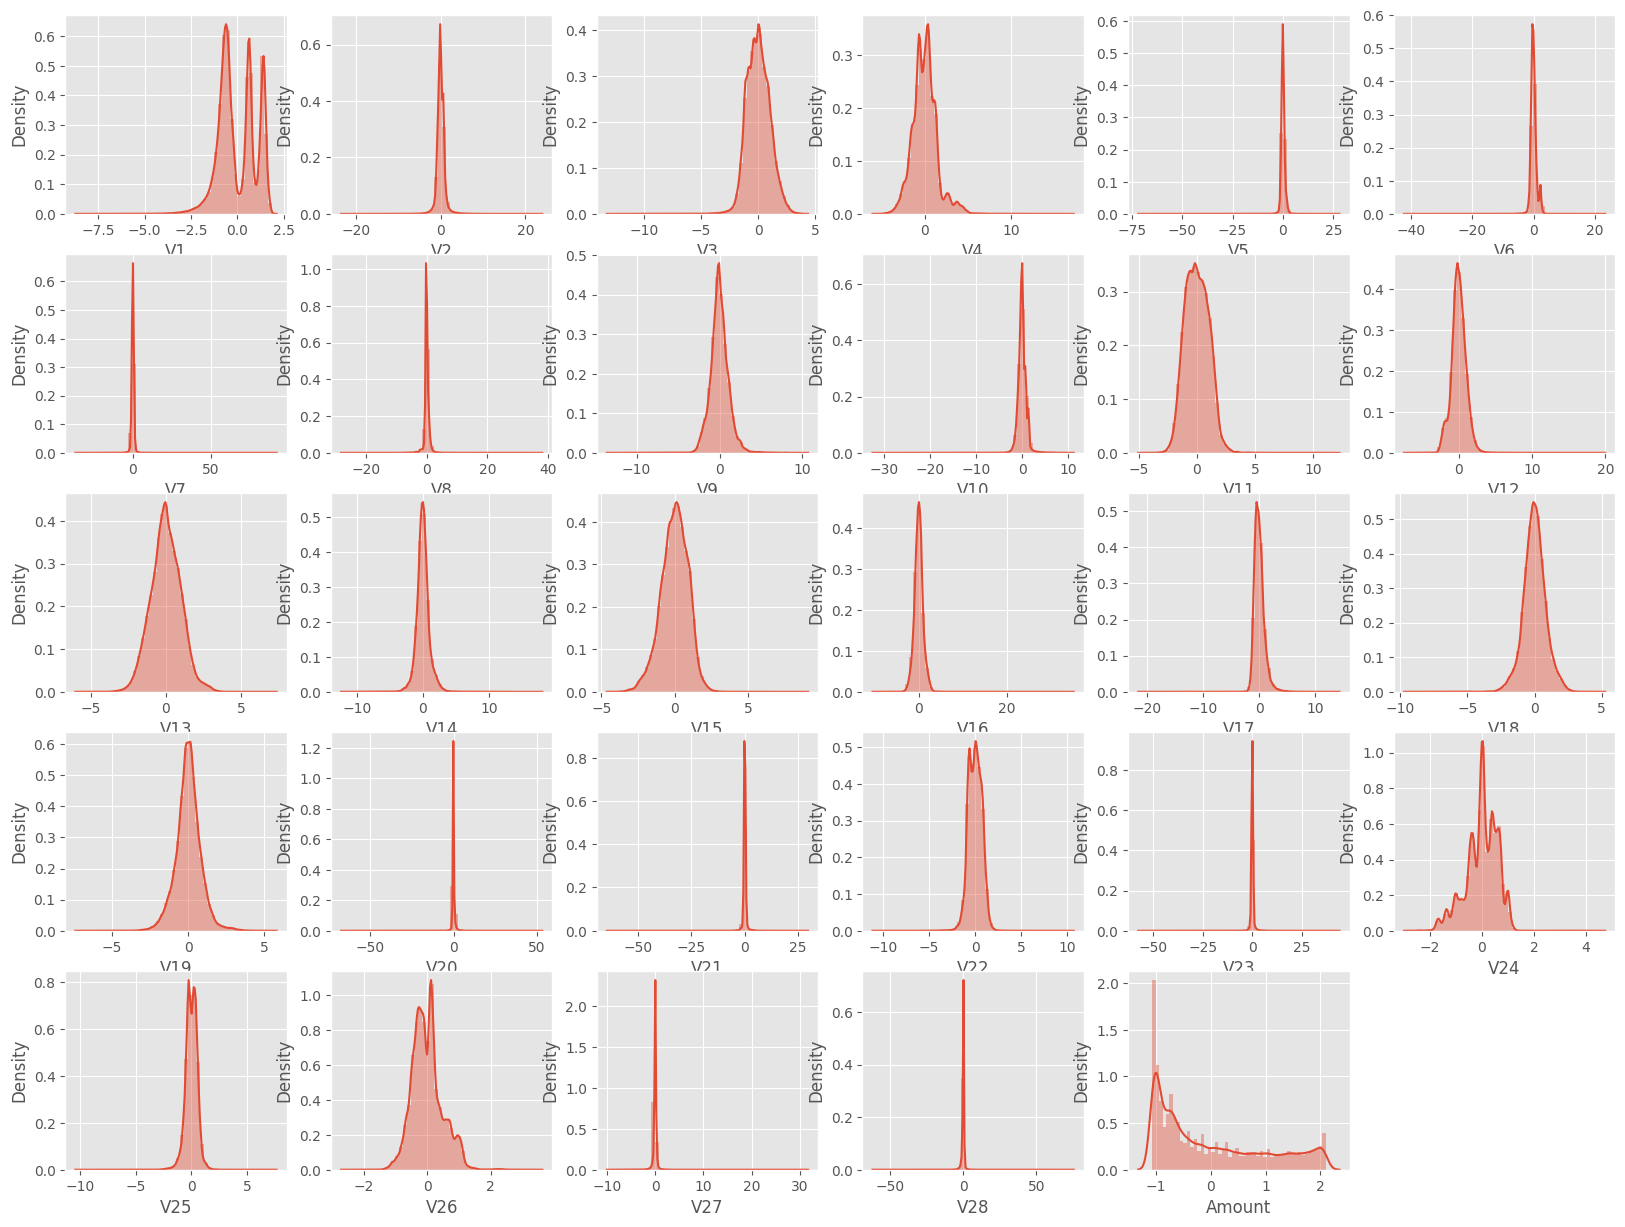

In [24]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building with imbalanced data

- Logistic Regression
- Decision Tree
- XGBoost

#### Metric selection on imbalance data
For the purpose of evaluating the model, we will employ the ROC-AUC score as the assessment metric. Since there are very few fraud incidents overall and the data is very skewed, accuracy is not the appropriate statistic to assess the model.

In [25]:
# Class imbalance
y_train.value_counts()/y_train.shape

Class
0    0.998271
1    0.001729
Name: count, dtype: float64

### 1. Logistic Regression

In [26]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9814533001655027
Best hyperparameters:  {'C': 0.01}


In [27]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       2.288081      0.298399         0.069081        0.013205     0.01   
1       2.435195      0.164588         0.067399        0.015488     0.10   
2       2.384560      0.140729         0.056476        0.011136     1.00   
3       1.778353      0.224488         0.060420        0.010111    10.00   
4       1.651894      0.122234         0.049953        0.004674   100.00   
5       1.573145      0.123980         0.043210        0.009449  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.966660           0.987834           0.991868   
1   {'C': 0.1}           0.967083           0.983684           0.990282   
2     {'C': 1}           0.967110           0.983119           0.989944   
3    {'C': 10}           0.967116           0.983046           0.989904   
4   {'C': 100}           0.967117           0.983038           0.989898   
5  {'C': 1000}           0.967117           0.983037           0.989897   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.971808           0.989097         0.981453        0.010193   
1           0.966392           0.984831         0.978454        0.009826   
2           0.965358           0.984313         0.977969        0.009870   
3           0.965231           0.984253         0.977910        0.009877   
4           0.965219           0.984247         0.977904        0.009876   
5           0.965218           0.984246         0.977903        0.009876   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.987070            0.981708   
1                2            0.984806            0.978714   
2                3            0.984310            0.978077   
3                4            0.984249            0.978002   
4                5            0.984242            0.977995   
5                6            0.984242            0.977994   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.980443            0.986561            0.980840   
1            0.978578            0.985010            0.979556   
2            0.978235            0.984692            0.979131   
3            0.978198            0.984655            0.979082   
4            0.978194            0.984652            0.979077   
5            0.978194            0.984652            0.979077   

   mean_train_score  std_train_score  
0          0.983324         0.002884  
1          0.981333         0.002939  
2          0.980889         0.002974  
3          0.980837         0.002977  
4          0.980832         0.002977  
5          0.980832         0.002977

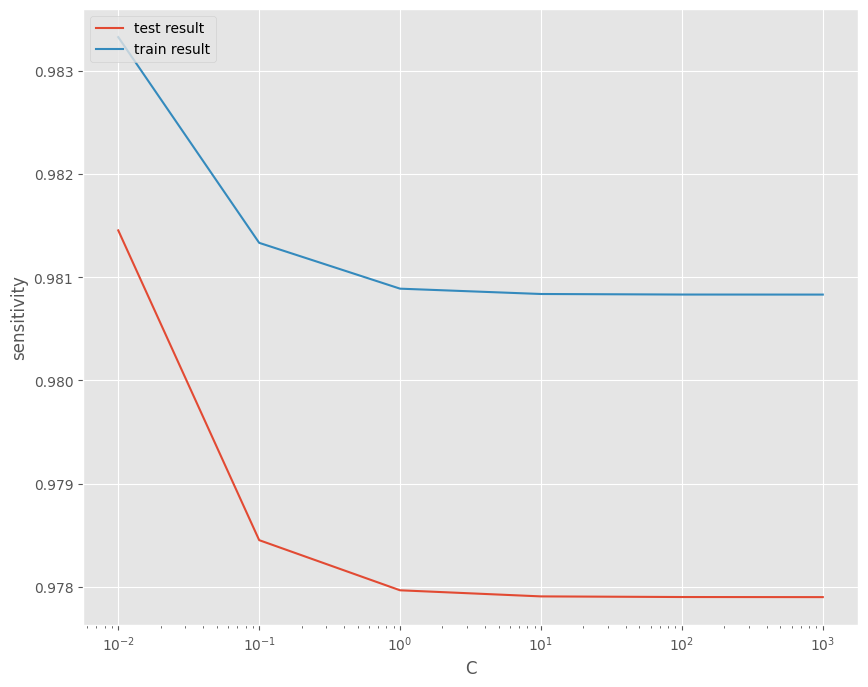

In [28]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [29]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Prediction and model evalution on the train set

In [30]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [31]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [32]:
display_scores(y_train, y_train_pred)

F1 Score: 73.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [33]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [34]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

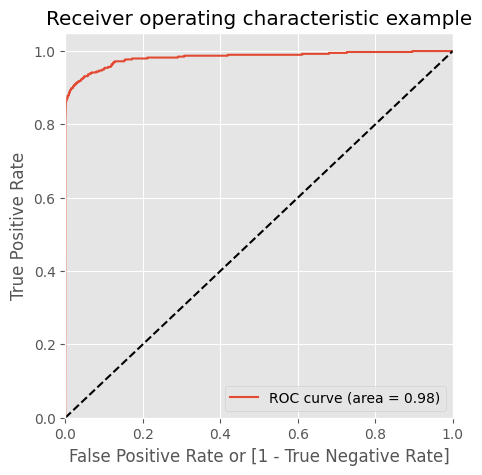

In [35]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [36]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 67.9%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

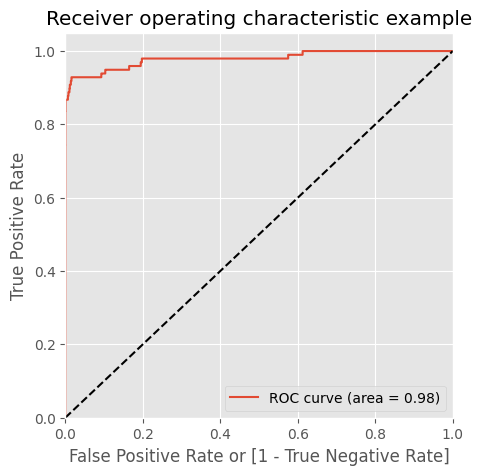

In [38]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see very good ROC on the test data set 0.98.

#### Model Summary

***Train set***
    - ROC : 98%
    - F1 Score: 73.76%
***Test set***
    - ROC : 98%
    - F1 score: 70.3%

### 2. Descission Tree

In [39]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [40]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.728431      0.216747         0.045881        0.005193   
1       6.830946      0.103442         0.045188        0.008598   
2       6.870462      0.427796         0.047260        0.009598   
3       7.023578      0.101936         0.045103        0.002489   
4      12.277085      0.137776         0.033562        0.002319   
5      10.438586      1.102738         0.031774        0.008890   
6       9.421761      0.072352         0.021041        0.001155   
7       9.492131      0.139764         0.017182        0.005316   

   param_max_depth  param_min_samples_leaf  param_min_samples_split  \
0                5                      50                       50   
1                5                      50                      100   
2                5                     100                       50   
3                5                     100                      100   
4               10                      50                       50   
5               10                      50                      100   
6               10                     100                       50   
7               10                     100                      100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.912643   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.912639   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.922268   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.922268   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.934914   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.934832   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.941068   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.955806   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.927341           0.951696         0.930560        0.016105   
1           0.927341           0.951702         0.930561        0.016109   
2           0.927130           0.952111         0.933836        0.013073   
3           0.927130           0.952111         0.933836        0.013073   
4           0.923849           0.915751         0.924838        0.007854   
5           0.916441           0.908234         0.919836        0.011121   
6           0.930678           0.908138         0.926628        0.013745   
7           0.930716           0.915638         0.934053        0.016568   

   rank_test_score  
0                5  
1                4  
2                2  
3                2  
4                7  
5                8  
6                6  
7                1

In [41]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9340532950076099
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Decision Tree with optimal hyperparameters

In [42]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Prediction on the train set

In [43]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



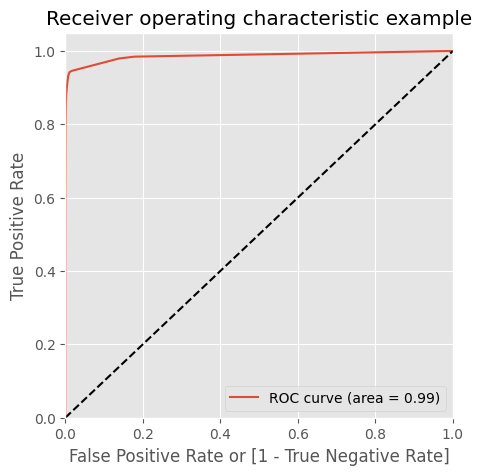

In [44]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Evaluating the model on the test set

In [45]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



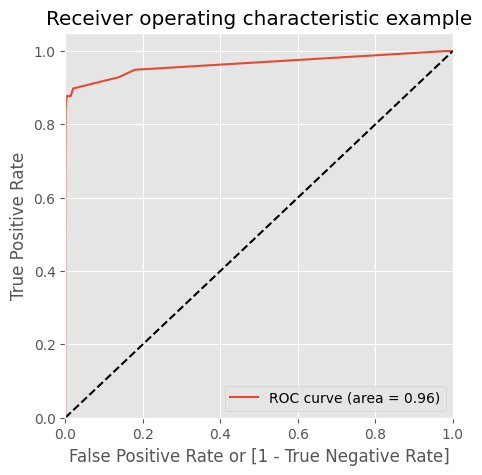

In [46]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

***Train set***
    - ROC Score: 99%
    - F1 score : 72.33%
    
***Test set***
    - ROC Score: 96%
    - F1 score : 71.88%

### 3. XGBoost

In [47]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [48]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.207853      0.354026         0.053969        0.005433   
1       0.878305      0.036829         0.047925        0.000821   
2       0.926047      0.021800         0.051902        0.003758   
3       0.958805      0.067220         0.040295        0.006048   
4       0.958423      0.155226         0.046807        0.000104   
5       1.144637      0.042336         0.061700        0.001356   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975544   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.978289   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.979435   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.963681   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.972600   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.978891   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.971866           0.987958         0.978456        0.006884   
1           0.978003           0.988162         0.981485        0.004723   
2           0.979555           0.988090         0.982360        0.004052   
3           0.970807           0.982317         0.972268        0.007678   
4           0.956419           0.980555         0.969858        0.010043   
5           0.972590           0.983698         0.978393        0.004549   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.999802            0.999812   
1                2            0.999546            0.999955   
2                1            0.999934            0.999876   
3                5            1.000000            0.999987   
4                6            1.000000            1.000000   
5                4            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999698          0.999770         0.000051  
1            0.999915          0.999805         0.000184  
2            0.999828          0.999879         0.000043  
3            0.999986          0.999991         0.000006  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

In [49]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9823599350857483
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [50]:
# Printing best parameters
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

#### XGBoost model with optimal hyperparameter

In [51]:
# Printing best parameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Model evaluation on train set

In [52]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



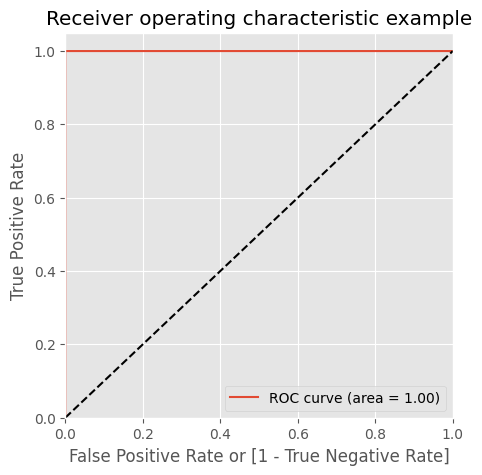

In [53]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Evaluating the model on the test set

In [54]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



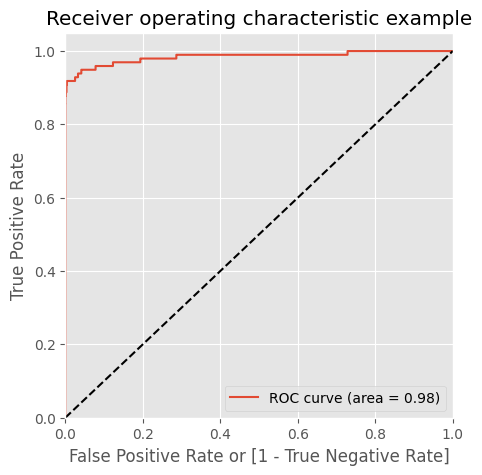

In [55]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary

***Train set***
    - ROC score: 100%
    - F1 score: 100.0%
***Test set***
    - ROC score: 97%
    - F1 score: 86.96%

**Out of these three models, the XGBoost model performs well on unbalanced data. With train data, the ROC-AUC score is 100%, while with test data, it is 97%.**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


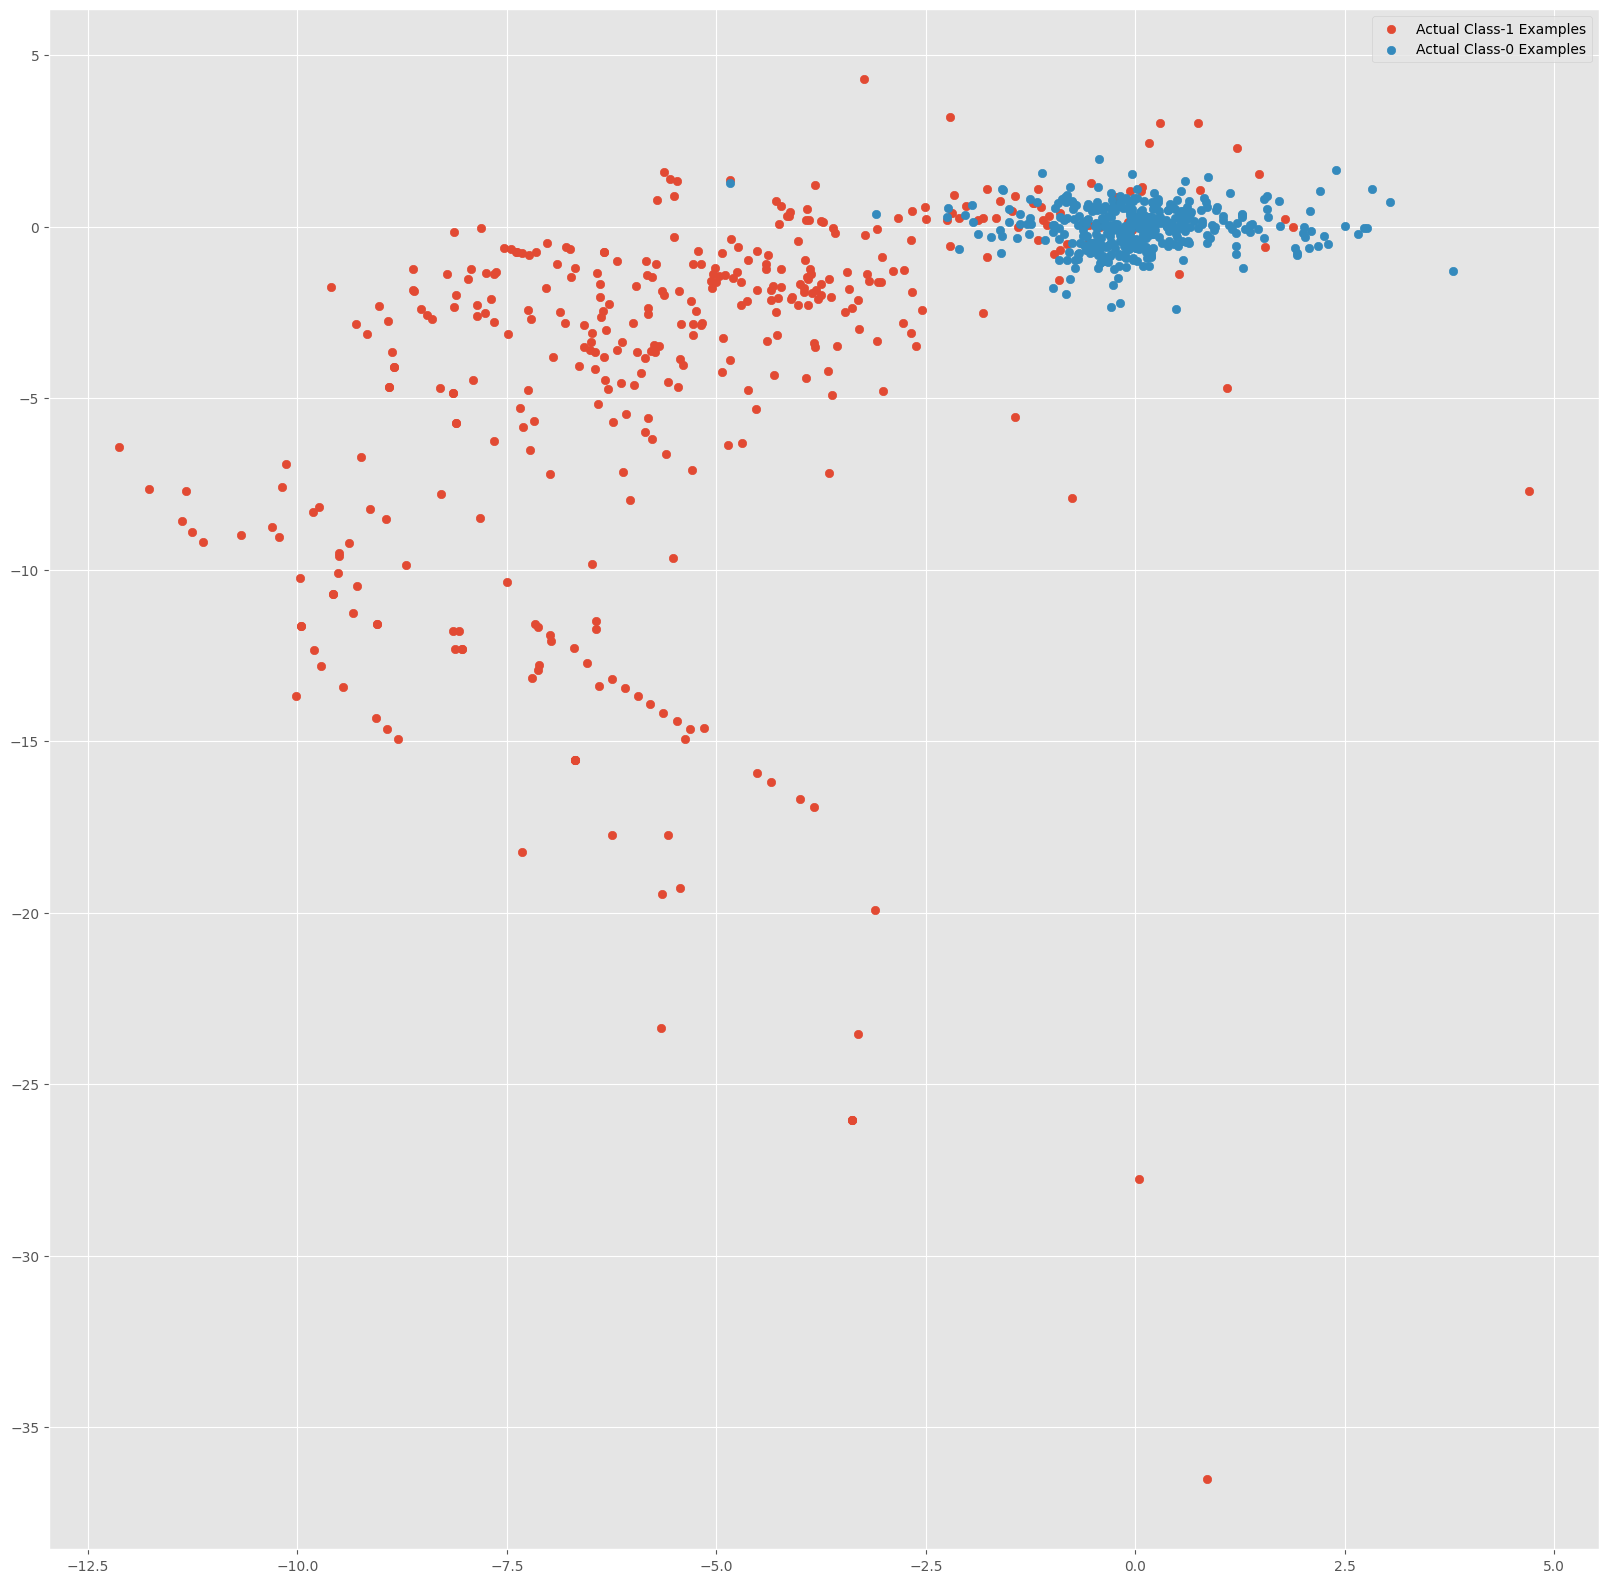

In [56]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [57]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.81609064


We can see that the threshold is 0.87, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Model building with balancing Classes

We are going to perform below over sampling approaches for handling data imbalance and we will pick the best approach based on model performance.
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [58]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [59]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1. Logistic Regrassion with Random Oversampling

In [60]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.987127027146008
Best hyperparameters:  {'C': 10}


In [61]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.701971      0.074301         0.025742        0.007379     0.01   
1       0.729368      0.068325         0.024984        0.006193     0.10   
2       0.724802      0.024261         0.023194        0.007322     1.00   
3       0.727654      0.027741         0.023131        0.006075    10.00   
4       0.709298      0.031233         0.027766        0.003294   100.00   
5       0.716052      0.019912         0.028286        0.003871  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.987211           0.986610           0.987241   
1   {'C': 0.1}           0.987340           0.986756           0.987370   
2     {'C': 1}           0.987355           0.986767           0.987391   
3    {'C': 10}           0.987357           0.986767           0.987393   
4   {'C': 100}           0.987358           0.986765           0.987393   
5  {'C': 1000}           0.987358           0.986765           0.987393   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.987106           0.986672         0.986968        0.000271   
1           0.987245           0.986836         0.987110        0.000260   
2           0.987259           0.986855         0.987125        0.000262   
3           0.987266           0.986852         0.987127        0.000264   
4           0.987262           0.986852         0.987126        0.000264   
5           0.987262           0.986852         0.987126        0.000264   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.986972            0.987042   
1                5            0.987113            0.987187   
2                4            0.987126            0.987202   
3                1            0.987129            0.987201   
4                3            0.987129            0.987199   
5                2            0.987129            0.987199   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.986871            0.986912            0.987094   
1            0.987007            0.987055            0.987233   
2            0.987028            0.987071            0.987249   
3            0.987030            0.987076            0.987247   
4            0.987030            0.987073            0.987248   
5            0.987030            0.987075            0.987248   

   mean_train_score  std_train_score  
0          0.986978         0.000082  
1          0.987119         0.000083  
2          0.987135         0.000081  
3          0.987137         0.000080  
4          0.987136         0.000080  
5          0.987136         0.000079

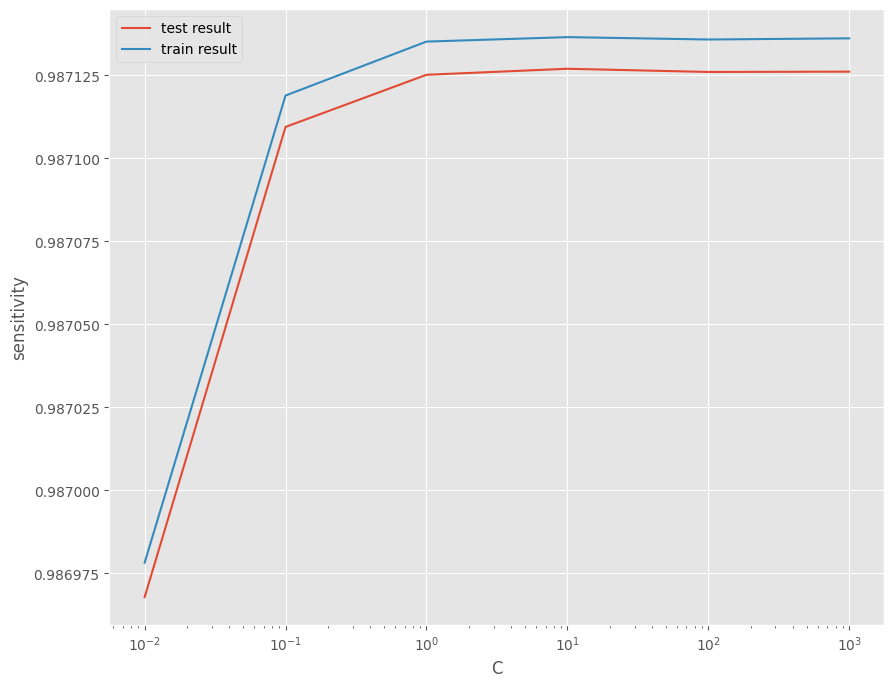

In [62]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with hyperparameter tuning

In [63]:
model_cv.best_params_

{'C': 10}

In [64]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [65]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [66]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.33%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



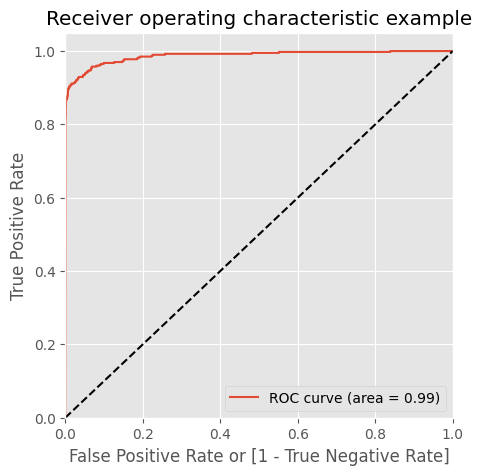

In [67]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [68]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.58%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



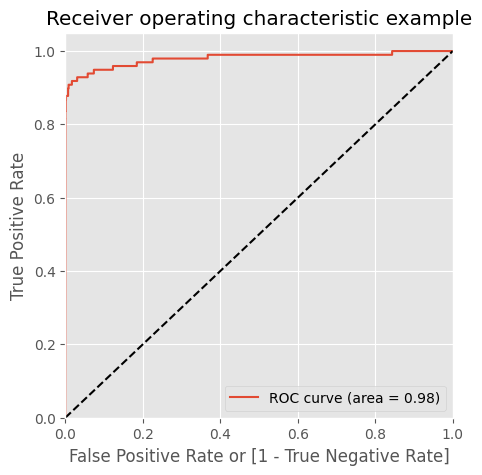

In [69]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
***Train set***
    - ROC score : 99%
    - F1 score: 94.33%
***Test set***
    - ROC score : 98%
    - F1 score: 10.57%

### 2. Decision Tree with Random Oversampling

In [70]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [71]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9988279382238247
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [72]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Model evatuation on train data

In [73]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.43%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



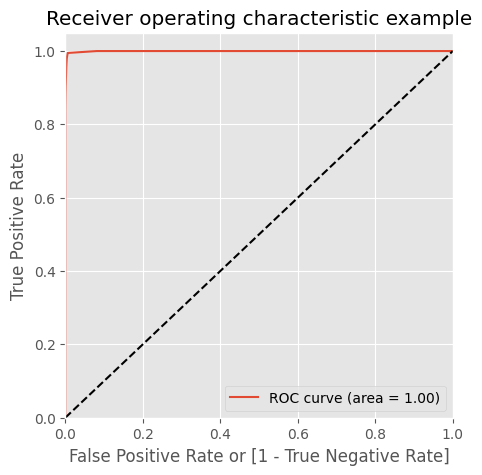

In [74]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [75]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 29.57%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.82      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.65     56962
weighted avg       1.00      0.99      1.00     56962



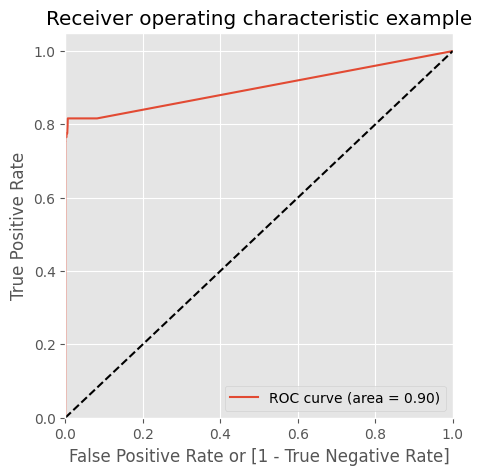

In [76]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
***Train set***
    - ROC score : 100%
    - F1 score: 99.43%
***Test set***
    - ROC score : 85%
    - F1 score: 29.57%

### 3. XGBoost with Random Oversampling

In [77]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [78]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.497197      0.072396         0.073315        0.007362   
1       1.881207      0.056235         0.082098        0.000649   
2       1.571122      0.019567         0.090561        0.008956   
3       2.021928      0.287358         0.094213        0.012026   
4       1.887230      0.312285         0.094316        0.011789   
5       1.618983      0.099684         0.095082        0.014211   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999862   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999859   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999857   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999971   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999983   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999977   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999866           0.999870         0.999866        0.000003   
1           0.999846           0.999850         0.999852        0.000006   
2           0.999848           0.999855         0.999853        0.000004   
3           0.999971           0.999966         0.999969        0.000002   
4           0.999989           0.999981         0.999985        0.000003   
5           0.999983           0.999969         0.999976        0.000006   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999869            0.999885   
1                6            0.999867            0.999858   
2                5            0.999867            0.999865   
3                3            0.999994            0.999993   
4                1            0.999992            0.999996   
5                2            0.999994            0.999992   

   split2_train_score  mean_train_score  std_train_score  
0            0.999878          0.999878         0.000006  
1            0.999874          0.999866         0.000006  
2            0.999874          0.999869         0.000004  
3            0.999997          0.999994         0.000002  
4            0.999994          0.999994         0.000002  
5            0.999997          0.999994         0.000002

In [79]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999847789916032
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [80]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

#### XGBoost with optimal hyperparameter

In [81]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Model evatuation on train data

In [82]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



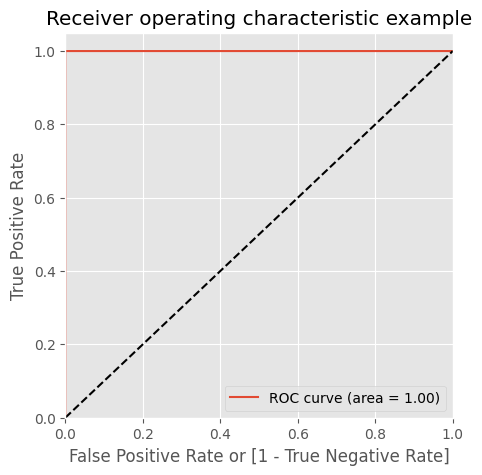

In [83]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Model evaluation on the test set

In [84]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 87.43%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



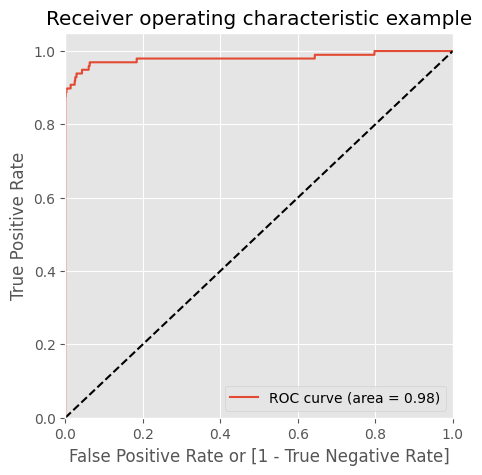

In [85]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 98%
    - F1 score: 89.01%

## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE 

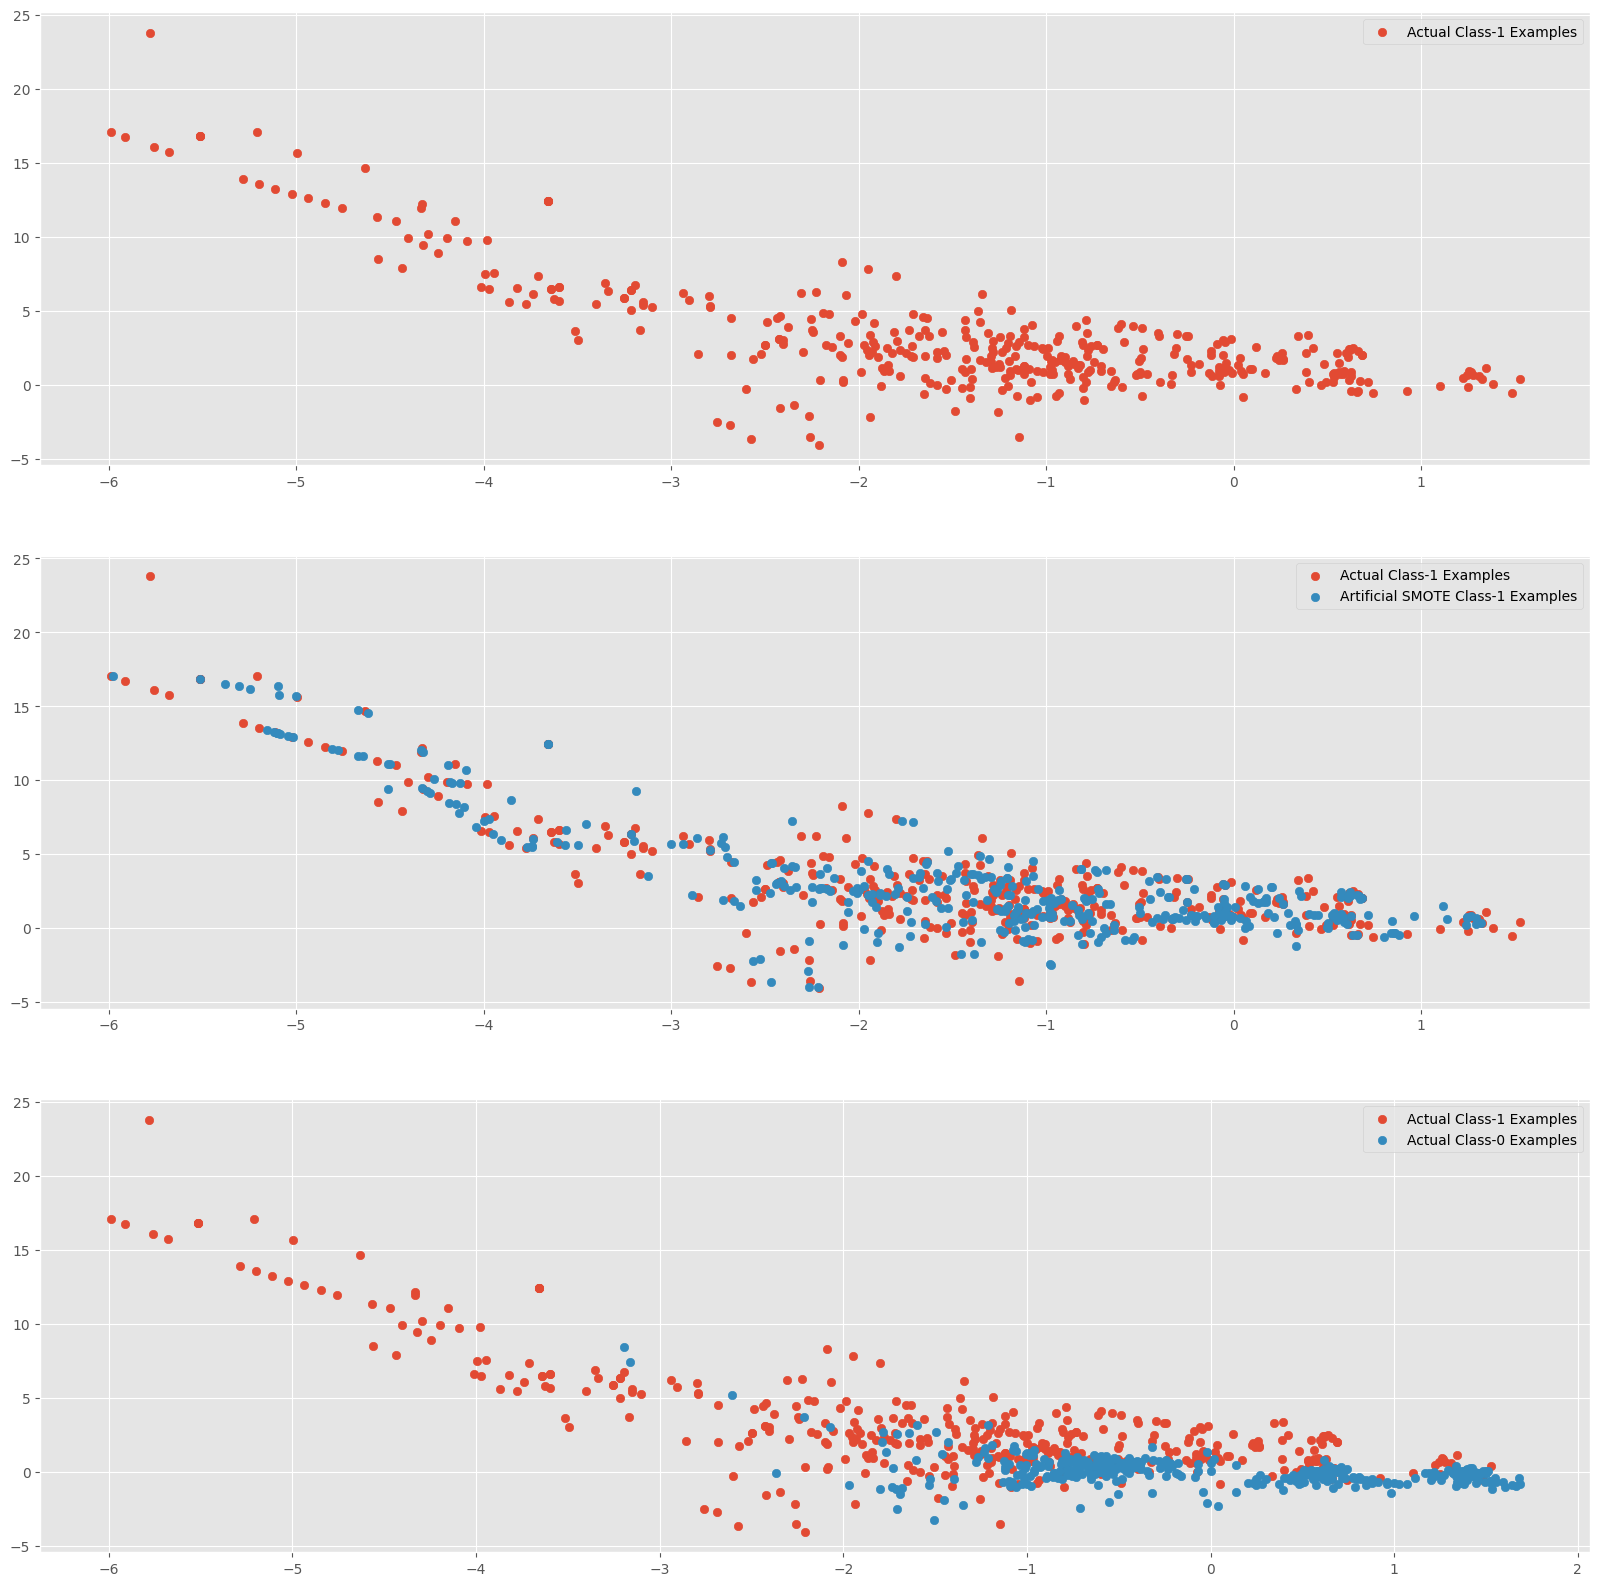

In [86]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with SMOTE

In [87]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9889850567288285
Best hyperparameters:  {'C': 1000}


In [88]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.599357      0.031927         0.021849        0.007451     0.01   
1       0.665679      0.030109         0.028303        0.006094     0.10   
2       0.699105      0.036020         0.025473        0.008069     1.00   
3       0.678668      0.022352         0.024227        0.008719    10.00   
4       0.676879      0.029795         0.024462        0.007239   100.00   
5       0.702607      0.030803         0.025187        0.007605  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988651           0.989114           0.988999   
1   {'C': 0.1}           0.988755           0.989218           0.989092   
2     {'C': 1}           0.988766           0.989230           0.989103   
3    {'C': 10}           0.988767           0.989231           0.989101   
4   {'C': 100}           0.988767           0.989231           0.989103   
5  {'C': 1000}           0.988767           0.989231           0.989104   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.988700           0.988880         0.988869        0.000175   
1           0.988807           0.988990         0.988973        0.000173   
2           0.988819           0.989004         0.988984        0.000173   
3           0.988820           0.989004         0.988985        0.000173   
4           0.988820           0.989004         0.988985        0.000173   
5           0.988820           0.989004         0.988985        0.000173   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988979            0.988781   
1                5            0.989080            0.988893   
2                4            0.989090            0.988905   
3                3            0.989091            0.988906   
4                2            0.989091            0.988906   
5                1            0.989091            0.988906   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988791            0.988910            0.988954   
1            0.988891            0.989010            0.989057   
2            0.988903            0.989021            0.989071   
3            0.988902            0.989022            0.989071   
4            0.988904            0.989022            0.989071   
5            0.988904            0.989022            0.989071   

   mean_train_score  std_train_score  
0          0.988883         0.000082  
1          0.988986         0.000080  
2          0.988998         0.000080  
3          0.988998         0.000080  
4          0.988999         0.000080  
5          0.988999         0.000080

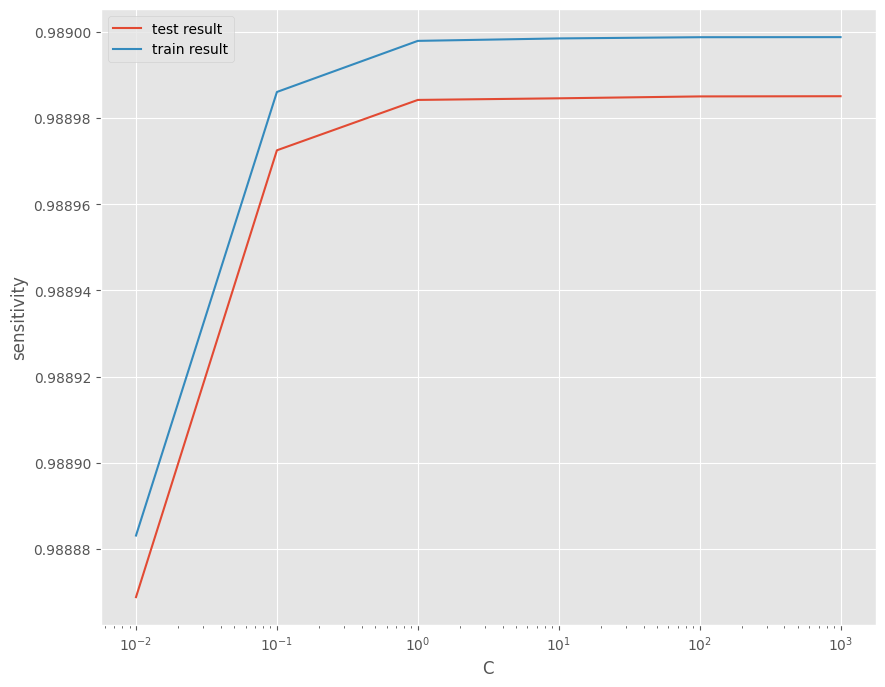

In [89]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [90]:
# Printing best params
model_cv.best_params_

{'C': 1000}

In [91]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

#### Evaluating the model on train data

In [92]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.22%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



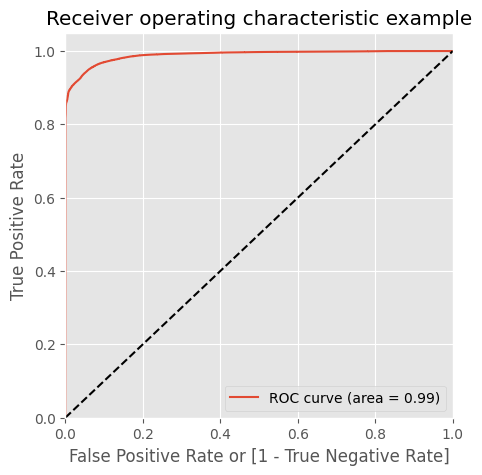

In [93]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluating on test data

In [94]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.78%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



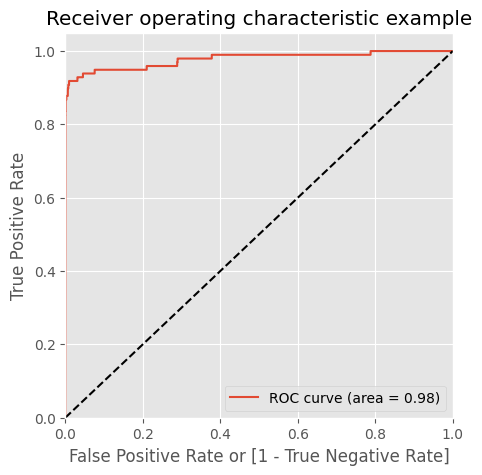

In [95]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

#### Model Summary
***Train set***
    - ROC score : 99%
    - F1 score: 94.23%
***Test set***
    - ROC score : 98%
    - F1 score: 9.79%

### 2. Decision Tree on balanced data with SMOTE

In [96]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [97]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9975964855146072
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [98]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [99]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Evaluating the model on train data

In [100]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.61%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



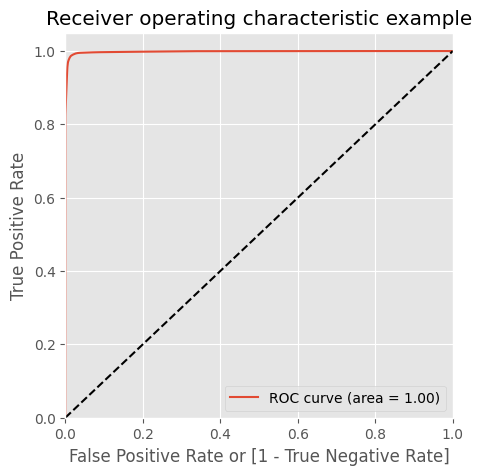

In [101]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [102]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 15.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



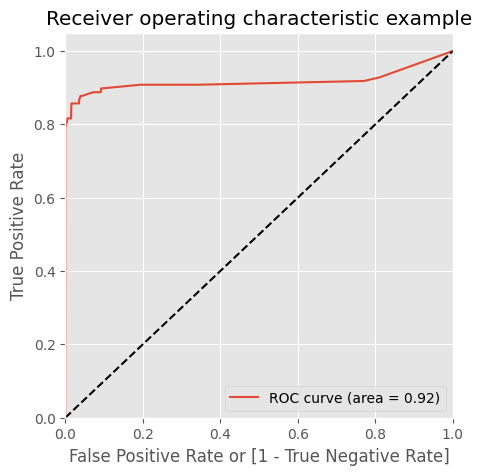

In [103]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

#### Model Summary
- Train set
    - ROC score : 100%
    - F1 score: 98.61%
- Test set
    - ROC score : 92%
    - F1 score: 15.62%

### 3. XGBoost on balanced data with SMOTE

In [104]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [105]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.520799      0.047899         0.084515        0.005478   
1       1.520849      0.024263         0.084076        0.013365   
2       1.673293      0.083607         0.096729        0.006439   
3       1.834332      0.071476         0.094445        0.008057   
4       1.738376      0.094463         0.091008        0.005103   
5       1.639441      0.173556         0.091930        0.010270   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999507   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999504   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999490   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999923   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999922   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999918   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999605           0.999536         0.999549        0.000041   
1           0.999541           0.999513         0.999519        0.000016   
2           0.999538           0.999499         0.999509        0.000021   
3           0.999934           0.999944         0.999933        0.000009   
4           0.999942           0.999924         0.999929        0.000009   
5           0.999940           0.999948         0.999936        0.000013   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999568            0.999600   
1                5            0.999560            0.999531   
2                6            0.999551            0.999543   
3                2            0.999955            0.999958   
4                3            0.999970            0.999967   
5                1            0.999962            0.999969   

   split2_train_score  mean_train_score  std_train_score  
0            0.999575          0.999581         0.000014  
1            0.999555          0.999549         0.000012  
2            0.999546          0.999546         0.000003  
3            0.999956          0.999956         0.000001  
4            0.999952          0.999963         0.000008  
5            0.999969          0.999967         0.000003

In [106]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999355396403536
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Model with optimal hyperparameter

In [107]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [108]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Evaluating the model on the train data

In [109]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



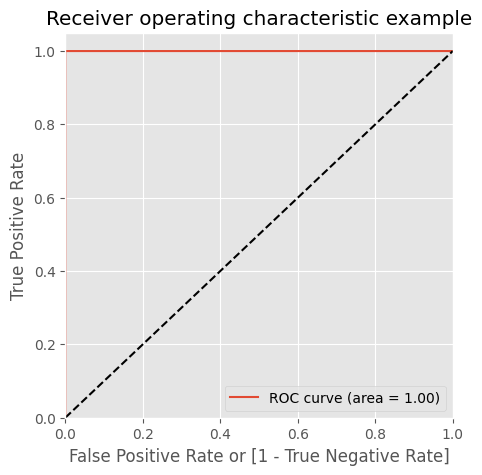

In [110]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on test data

In [111]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



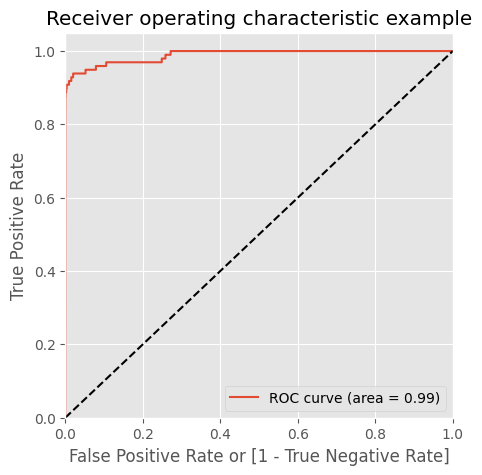

In [112]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
- Train set
    - ROC score : 100.0%
    - F1 score: 100.0%
- Test set
    - ROC score : 99%
    - F1 score: 80.95%

## ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

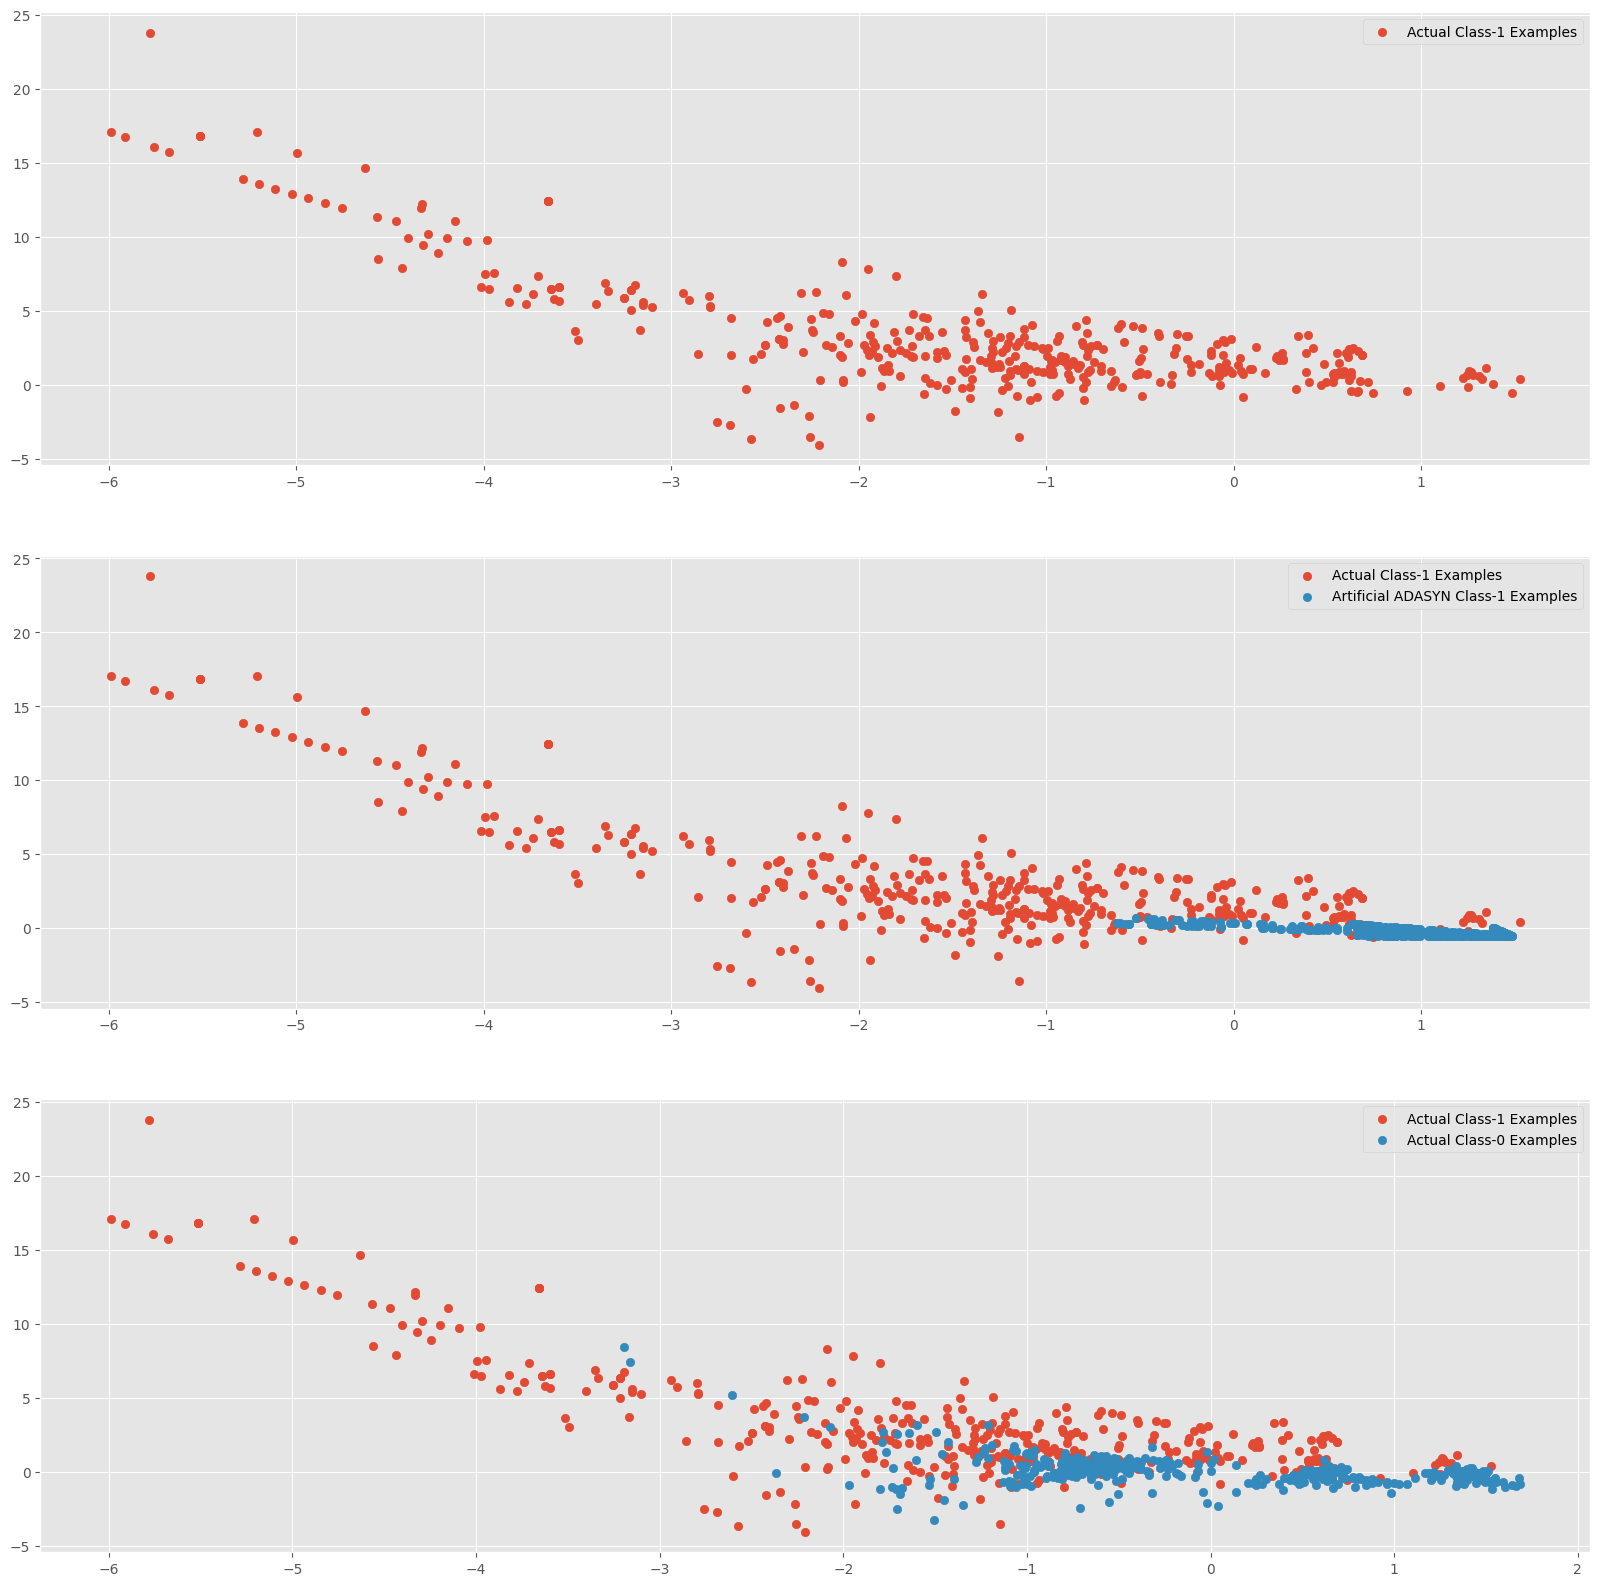

In [113]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 1. Logistic Regression on balanced data with ADASYN

In [114]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9616414685446637
Best hyperparameters:  {'C': 1000}


In [115]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.600472      0.006752         0.042940        0.008297     0.01   
1       0.614728      0.024706         0.041934        0.007257     0.10   
2       0.630424      0.004589         0.047074        0.012554     1.00   
3       0.606874      0.007206         0.042587        0.008077    10.00   
4       0.609374      0.014117         0.050668        0.008960   100.00   
5       0.610276      0.016538         0.046374        0.001430  1000.00   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.961196           0.961285           0.961634   
1   {'C': 0.1}           0.961446           0.961528           0.961888   
2     {'C': 1}           0.961467           0.961546           0.961907   
3    {'C': 10}           0.961469           0.961544           0.961909   
4   {'C': 100}           0.961470           0.961545           0.961909   
5  {'C': 1000}           0.961470           0.961546           0.961909   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.961372        0.000189                6            0.961506   
1         0.961620        0.000192                5            0.961764   
2         0.961640        0.000192                4            0.961786   
3         0.961641        0.000192                3            0.961788   
4         0.961641        0.000192                2            0.961788   
5         0.961641        0.000192                1            0.961788   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.961237            0.961431          0.961391         0.000113  
1            0.961480            0.961678          0.961640         0.000119  
2            0.961498            0.961698          0.961660         0.000120  
3            0.961497            0.961699          0.961661         0.000122  
4            0.961498            0.961700          0.961662         0.000121  
5            0.961498            0.961700          0.961662         0.000121

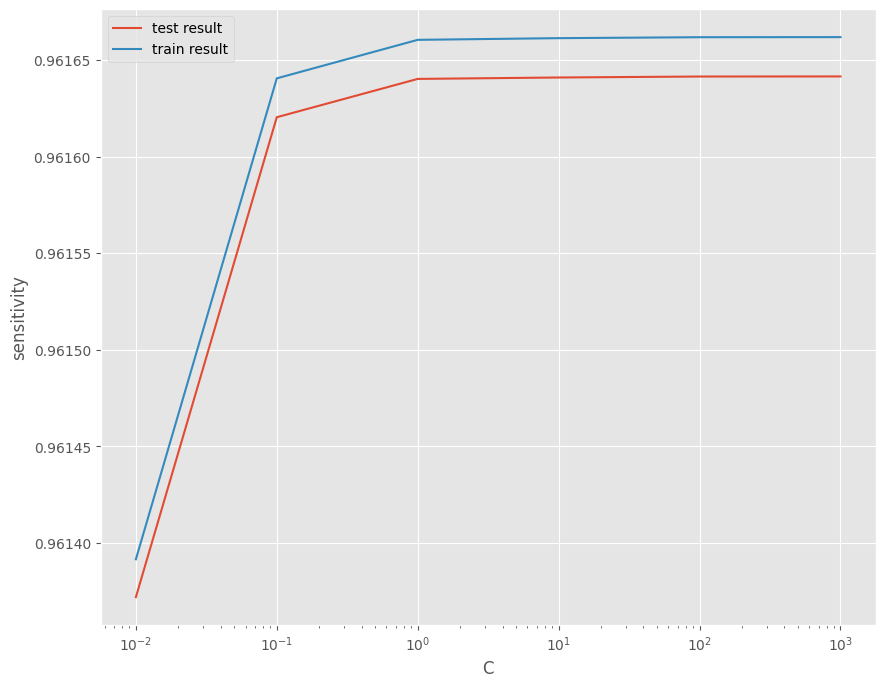

In [116]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [117]:
model_cv.best_params_

{'C': 1000}

In [118]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### Evaluating the model with train data

In [119]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 89.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885



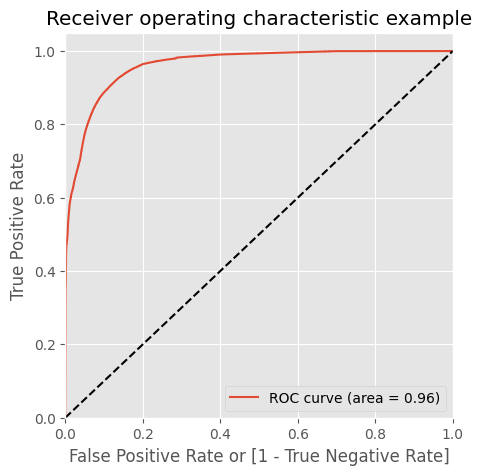

In [120]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [121]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



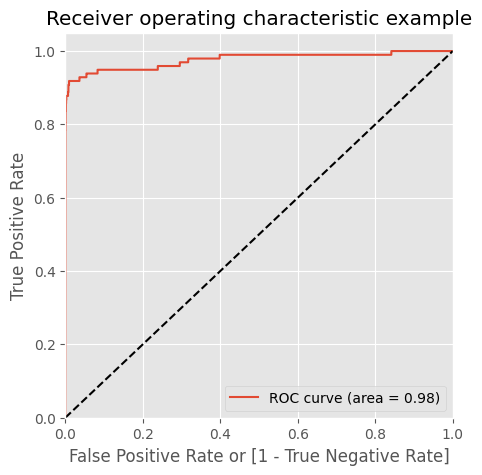

In [122]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
***Train set***
    - ROC score : 96%
    - F1 score: 89.2%
***Test set***
    - ROC score : 98%
    - F1 score: 3.23%

### 2. Decision Tree on balanced data with ADASYN

In [123]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [124]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9411196490795029
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Model with optimal hyperparameters

In [125]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Evaluating the model on train data

In [126]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.79%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      1.00      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



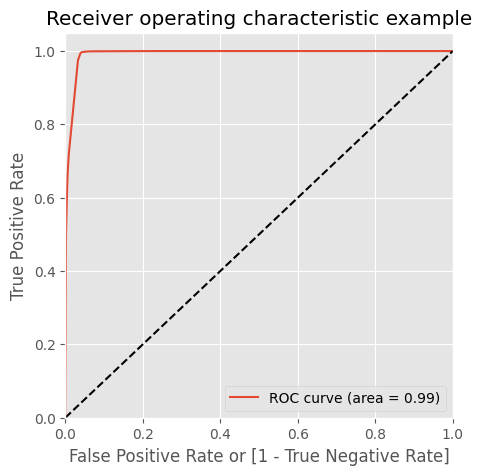

In [127]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [128]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.05%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



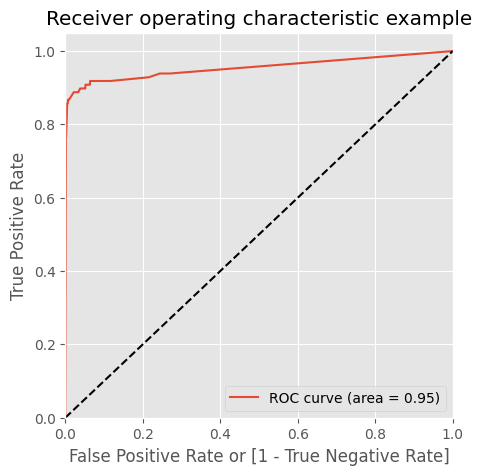

In [129]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
***Train set***
    - ROC score : 99%
    - F1 score: 97.79%
***Test set***
    - ROC score : 95%
    - F1 score: 7.05%

### 3. XGBoost on balanced data with ADASYN

In [130]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [131]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.589149      0.095374         0.081158        0.003751   
1       1.627750      0.100607         0.090565        0.013587   
2       1.692220      0.070893         0.079543        0.005269   
3       1.624676      0.032583         0.080033        0.003559   
4       1.923481      0.155074         0.096749        0.004605   
5       1.544182      0.045955         0.094847        0.014548   

   param_learning_rate  param_subsample  \
0                  0.2              0.3   
1                  0.2              0.6   
2                  0.2              0.9   
3                  0.6              0.3   
4                  0.6              0.6   
5                  0.6              0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.984266   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.982464   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.983352   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.992567   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.990122   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.994134   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.966556           0.995875         0.982232        0.012055   
1           0.969336           0.995712         0.982504        0.010768   
2           0.965484           0.995981         0.981606        0.012511   
3           0.965351           0.998675         0.985531        0.014485   
4           0.969283           0.998989         0.986131        0.012451   
5           0.966257           0.998817         0.986403        0.014373   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.998994            0.999084   
1                4            0.998931            0.999086   
2                6            0.998951            0.999032   
3                3            0.999929            0.999908   
4                2            0.999917            0.999929   
5                1            0.999926            0.999898   

   split2_train_score  mean_train_score  std_train_score  
0            0.998720          0.998933         0.000155  
1            0.998764          0.998927         0.000132  
2            0.998802          0.998928         0.000095  
3            0.999841          0.999893         0.000037  
4            0.999920          0.999922         0.000005  
5            0.999909          0.999911         0.000011

In [132]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9864030795609904
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


#### Model with optimal hyperparameter

In [133]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [134]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

#### Evaluating the model on the train data

In [135]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



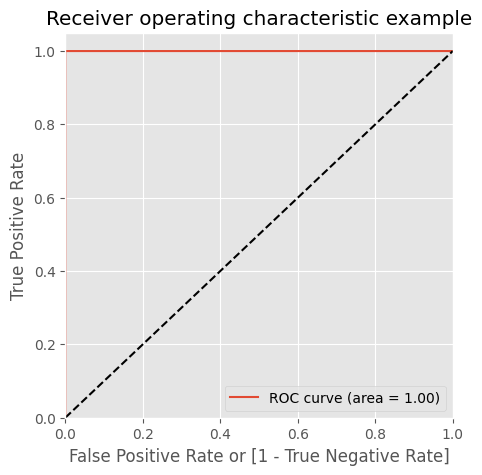

In [136]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [137]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 82.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



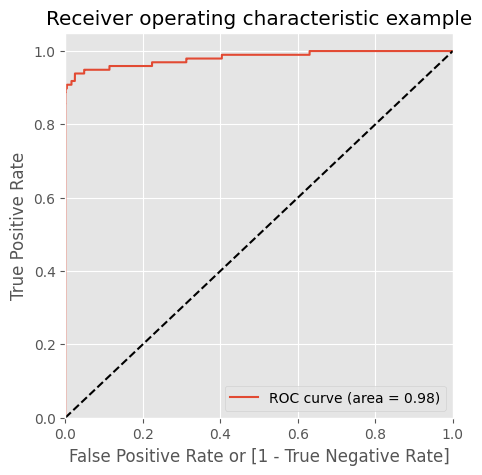

In [138]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model Summary
***Train set***
    - ROC score : 100.0%
    - F1 score: 100.0%
***Test set***
    - ROC score : 98%
    - F1 score: 82.3%

### best result on a model
We use different types of measures to resolve the inequality of minority classes. We use random oversampling, SMOTE and Adasyn strategies to balance the data, and then perform logistic regression, random forest and XGBoost algorithms to build the models of each sampling method.

After testing on all oversampling methods, we found that the XGBoost model performs well with the AdaSyn method on the same data. We achieved 100% ROC score on training data, 98% ROC score on test data, 100% ROC score on training data and 82.3% F1 score on data. 

Hence, we conclude that the `XGBoost model with Adasyn` is the best model.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


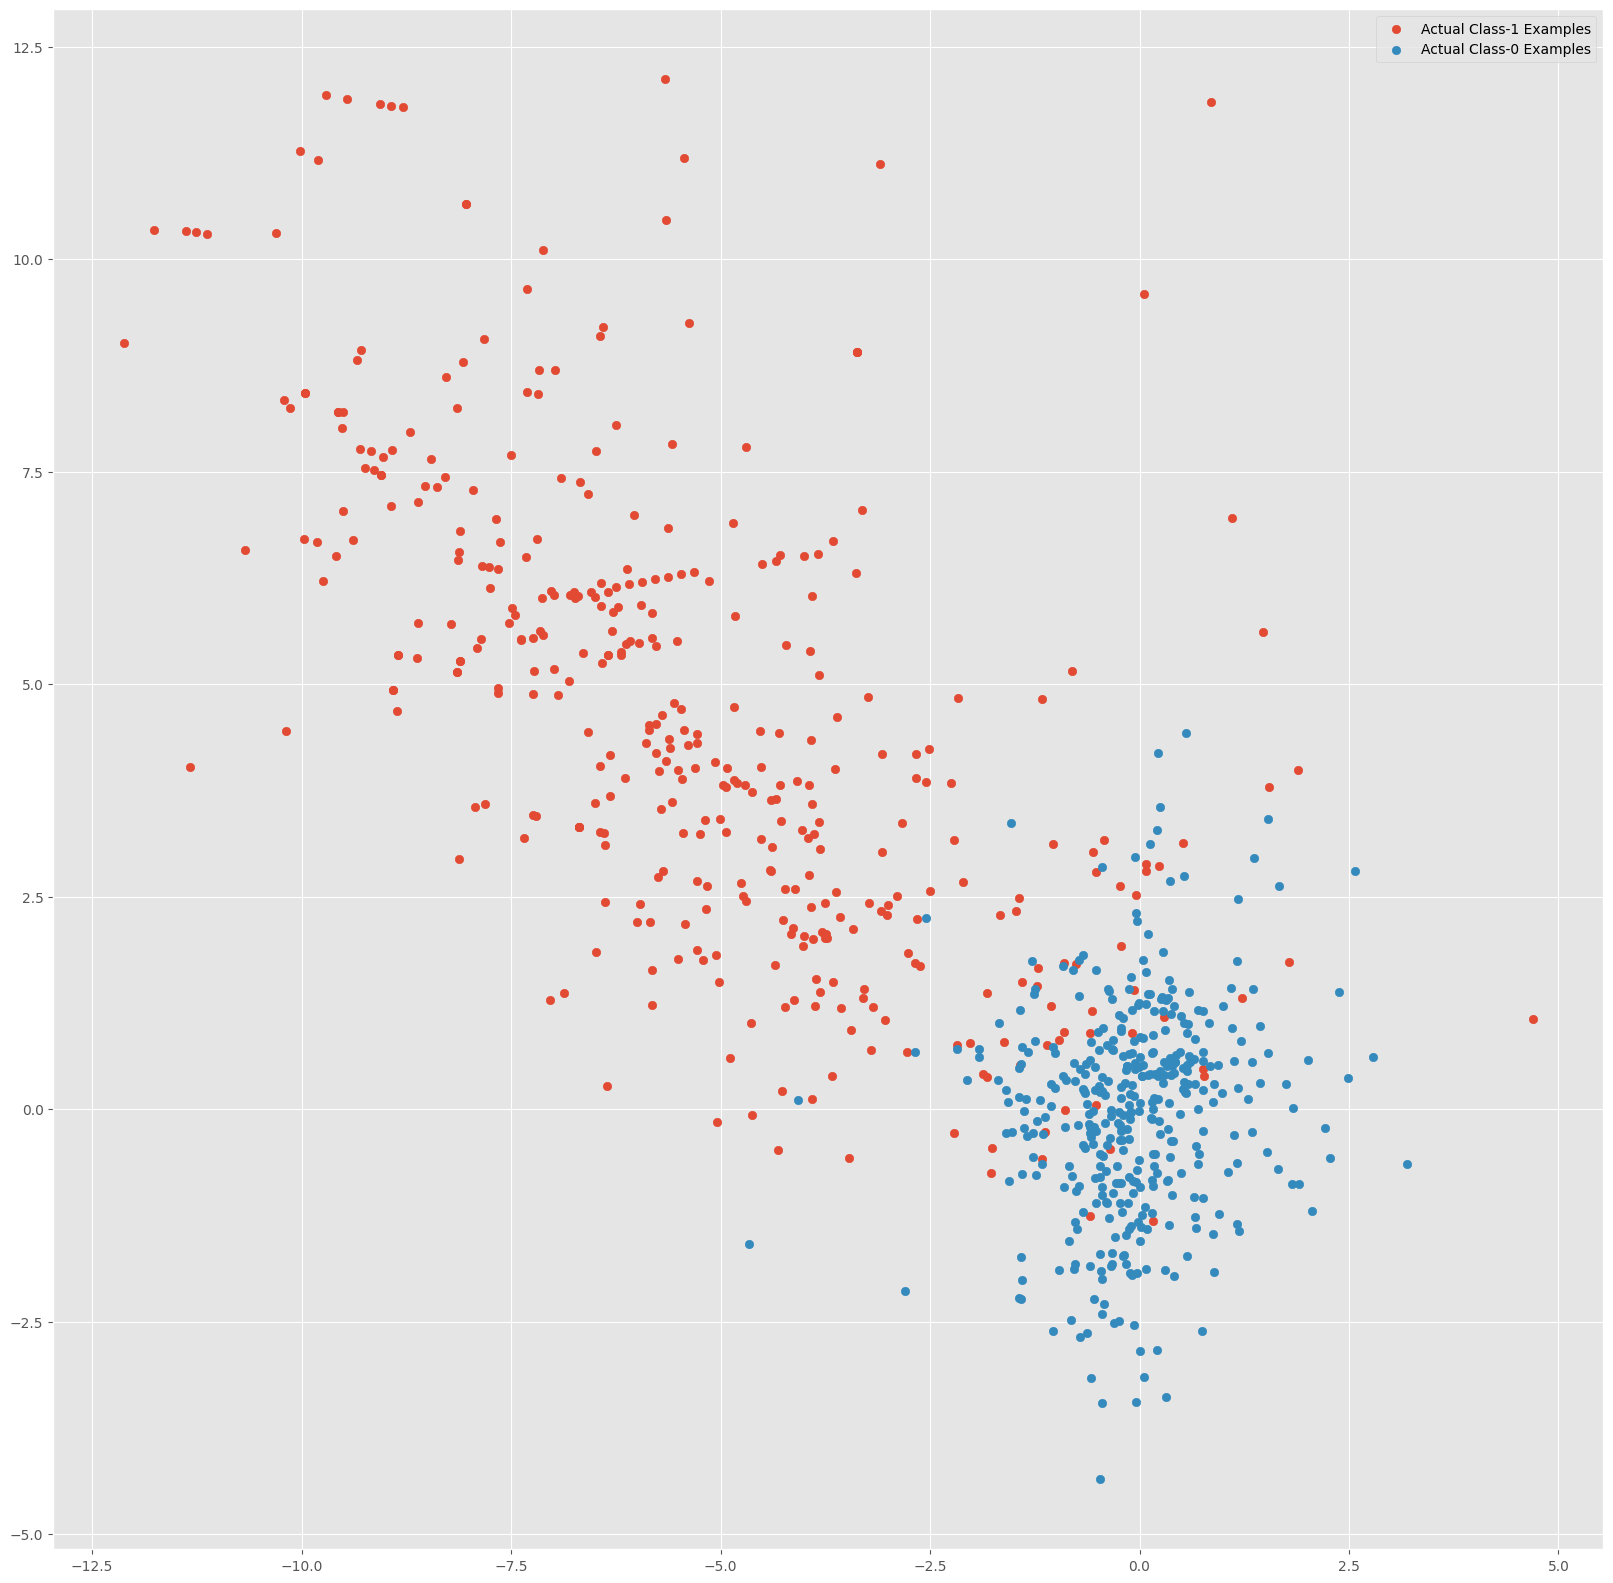

In [139]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [144]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold*100)

Train auc = 1.0
92.23263263702393


We have found that 92.23% is the threshold for which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.

# Summary
## Strategic Selection of XGBoost Model for Credit Card Fraud Detection

- Our main goal in finding effective solutions to combat credit card fraud is to achieve high recovery rates. High return is important to determine the percentage of real artificial energy and to provide the power to preserve the artifact at a high value.


- Considering that companies face serious problems of loss of money, trust and confidence due to fraud, early recovery can be a good option to protect the health of the bank and the interests of its customers.

## Model Evaluation and Selection Process

In our analysis, we tried to work with various machine learning models using the power of ADASYN (Adaptive Synthetic Sampling) technology to balance the data. Among the decision models, the XGBoost model performs well. Here are the key findings:

- **ROC Score:** The XGBoost model delivers an impressive **99% ROC score**, demonstrating its ability to distinguish between good and bad classes.

- **Return:** It is shown with an unusually high **85% return** on balanced data. This measure is important to ensure that most real scams are correctly detected.

## Why to Choose XGBoost

 Therefore, based on a comprehensive evaluation of performance metrics, the XGBoost model, combined with ADASYN parallel data technology, became our first choice for a compelling solution to credit card fraud. This decision was based on the model’s ability to not only deliver good ROC scores, but more importantly, its ability to identify key, important factors in reducing the impact of fraud on financial institutions and their customers.

- By using the XGBoost model within the ADASYN framework, we aim to improve the monitoring and fraud prevention methods banks use, thus strengthening their protection against the changing credit card fraud landscape.


# Thank You